In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from lmfit import Model
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from ipynb.fs.full.bessy_kmc_II_master import *
import re

In [14]:
PATH="D:\\Dokumente\\General_Data\\220304-Babsi\\"
PATH_ANTON=PATH

SPEC_FILE = "25SC_s1"
FILE_ANTON="25SC_s1.xls"
SCAN_START=  3
SCAN_END = 52
XRAY_CONSTANT = 1.8436
PEAK = [1,1,1]
WEAVELENGTH = 0.154
PEAK_PARAMS = [37, 37.75, 39.25, 40]

25SC_s1_0003.000.dat
(38.495196575575775, 0.0061880341887837675)


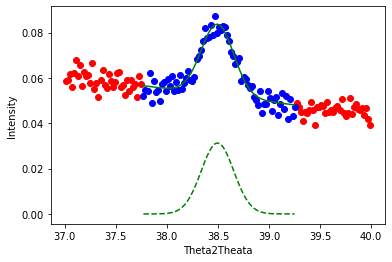

25SC_s1_0003.001.dat
(38.5044931209828, 0.007188460707798668)


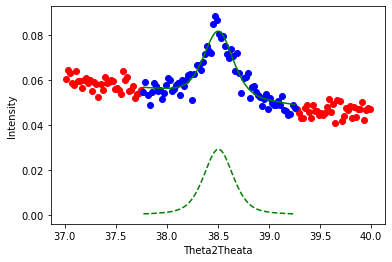

25SC_s1_0003.002.dat
(38.513998317327264, 0.013016445567825614)


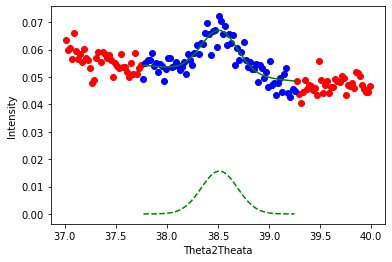

25SC_s1_0003.003.dat
(38.51902143379507, 0.01587611410750239)


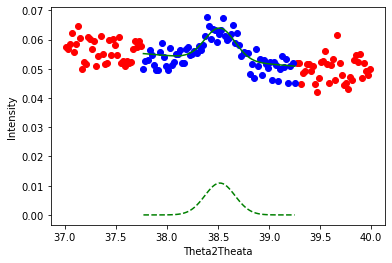

25SC_s1_0003.004.dat
(38.48047086230395, 0.023072185771817067)


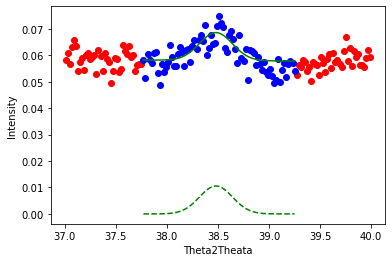

[0.00020231 0.00019658 0.0001865  0.00019066 0.00022255]


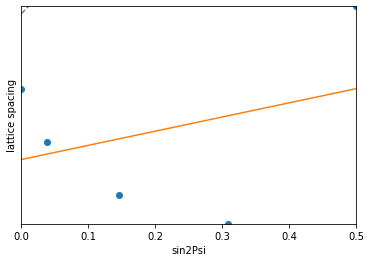

25SC_s1_0004.000.dat
(38.55124293632579, 0.006780495649933625)


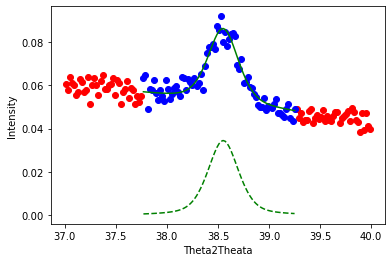

25SC_s1_0004.001.dat
(38.55644213987195, 0.009482768628807807)


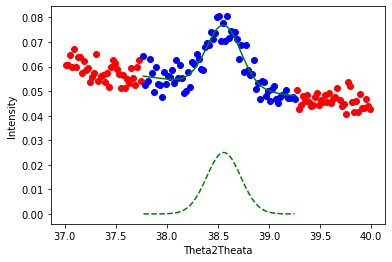

25SC_s1_0004.002.dat
(38.5179918521254, 0.011126289752992598)


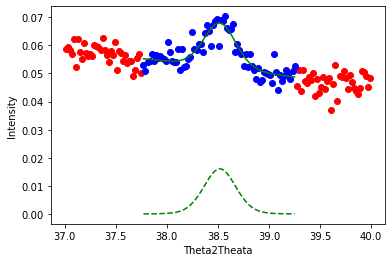

25SC_s1_0004.003.dat
(38.53591917308731, 0.018159121694414193)


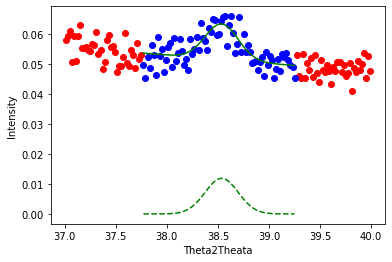

25SC_s1_0004.004.dat
(38.477559951916575, 0.014421922652311814)


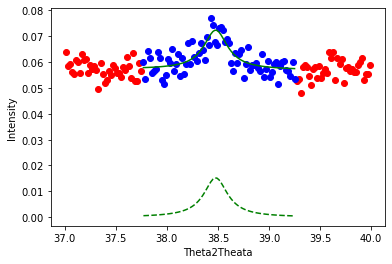

[0.00021644 0.00021031 0.00019953 0.00020398 0.00023809]


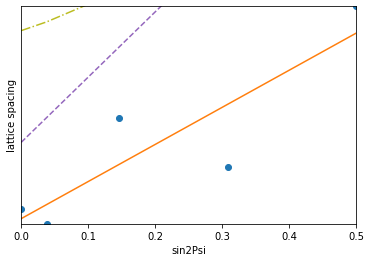

25SC_s1_0005.000.dat
(38.58353238759219, 0.007095694712247639)


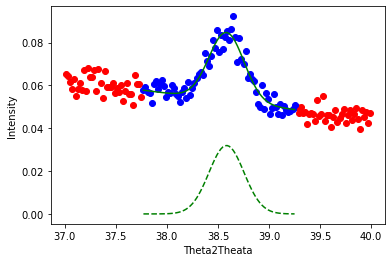

25SC_s1_0005.001.dat
(38.5743216946333, 0.007055175241251716)


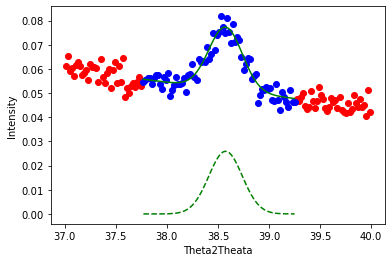

25SC_s1_0005.002.dat
(38.57609398841026, 0.013397094722854259)


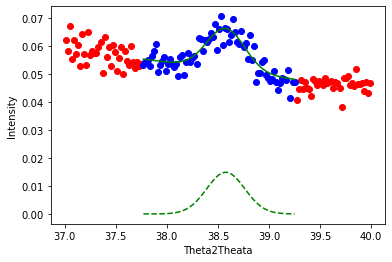

25SC_s1_0005.003.dat
(38.494767493601884, 0.026080983324132435)


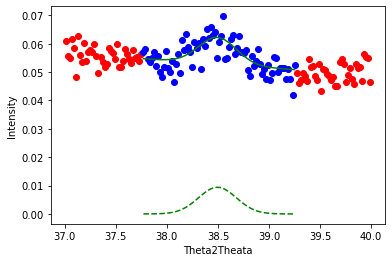

25SC_s1_0005.004.dat
(38.438273033598136, 0.014370713467107225)


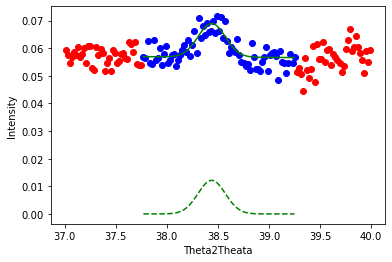

[0.00021227 0.00020625 0.00019568 0.00020004 0.0002335 ]


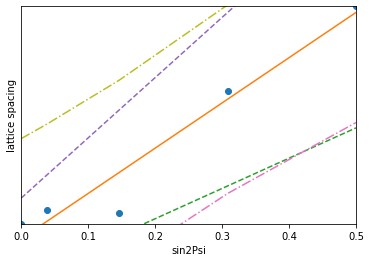

25SC_s1_0006.000.dat
(38.59480130557318, 0.006280557099025648)


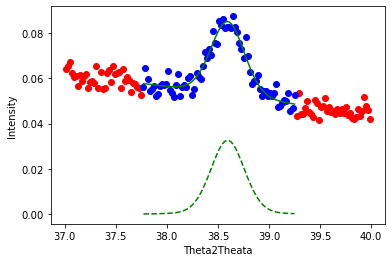

25SC_s1_0006.001.dat
(38.617532151630904, 0.007140146990408518)


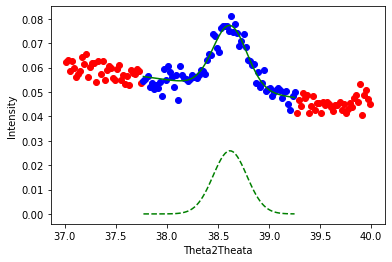

25SC_s1_0006.002.dat
(38.60028593148284, 0.01492687478441529)


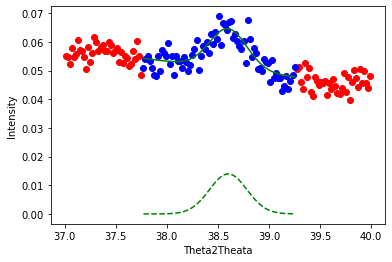

25SC_s1_0006.003.dat
(38.520876994416966, 0.021956199139037604)


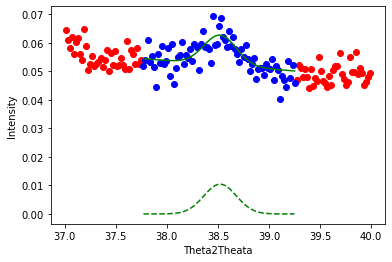

25SC_s1_0006.004.dat
(38.44997985158994, 0.01679005105249093)


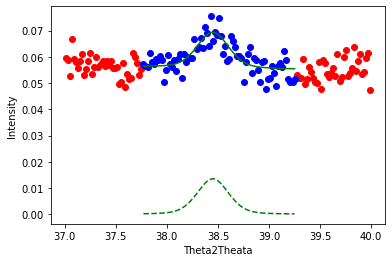

[0.0002752  0.00026739 0.00025369 0.00025935 0.00030272]


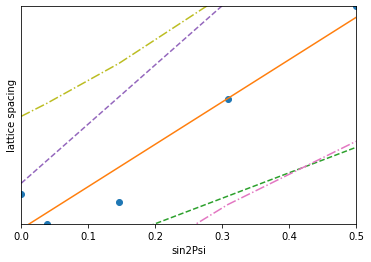

25SC_s1_0007.000.dat
(38.64576065269805, 0.0065530658712571015)


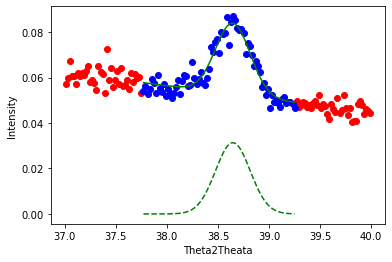

25SC_s1_0007.001.dat
(38.63392367913721, 0.008279128682144792)


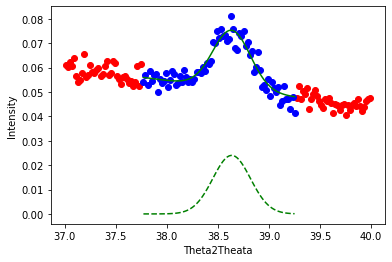

25SC_s1_0007.002.dat
(38.597038227254465, 0.012411585754071294)


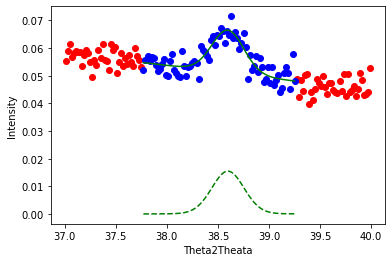

25SC_s1_0007.003.dat
(38.538824199183985, 0.018746042620983776)


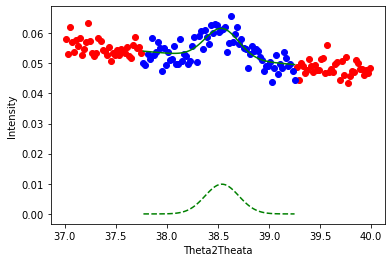

25SC_s1_0007.004.dat
(38.458829591068394, 0.01631289391854649)


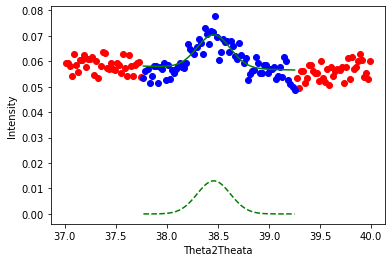

[5.36970314e-05 5.21743199e-05 4.94998754e-05 5.06050415e-05
 5.90684509e-05]


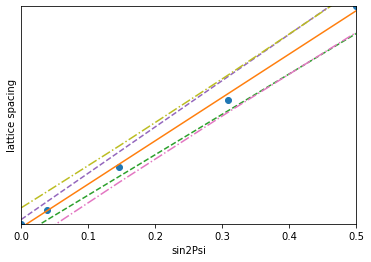

25SC_s1_0008.000.dat
(38.68172662237813, 0.00814271013602731)


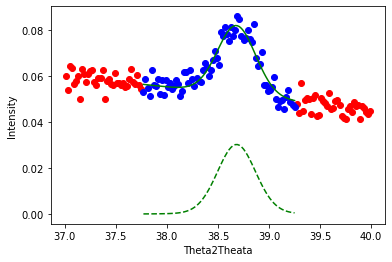

25SC_s1_0008.001.dat
(38.68465491883737, 0.009679350889106698)


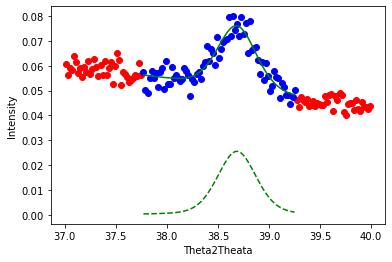

25SC_s1_0008.002.dat
(38.644690835637476, 0.01373631232963595)


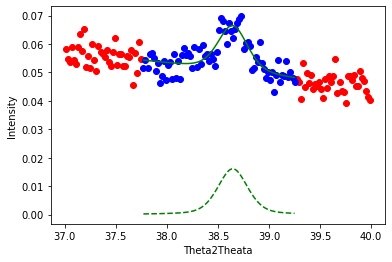

25SC_s1_0008.003.dat
(38.52195499659465, 0.016779793258090547)


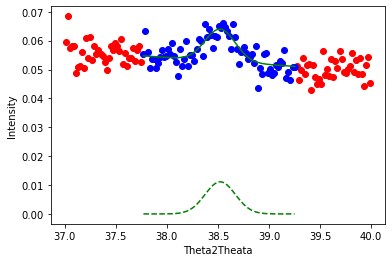

25SC_s1_0008.004.dat
(38.38622940843896, 0.014058809809069202)


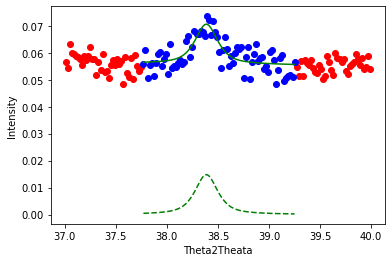

[0.00028098 0.00027301 0.00025902 0.0002648  0.00030909]


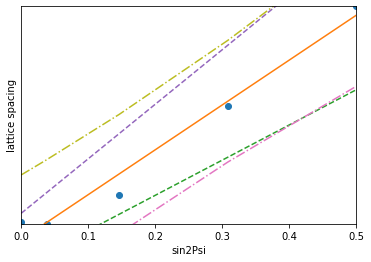

25SC_s1_0009.000.dat
(38.72488966922681, 0.006782679589243227)


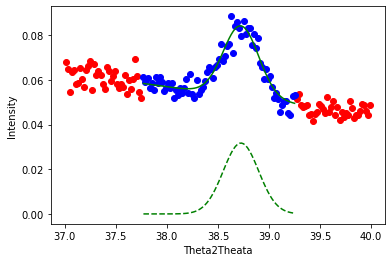

25SC_s1_0009.001.dat
(38.691616082869764, 0.01030731242410393)


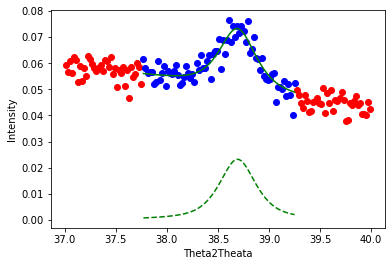

25SC_s1_0009.002.dat
(38.66243565333616, 0.020212956124823836)


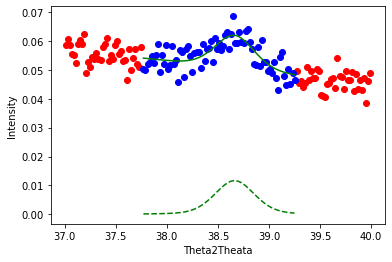

25SC_s1_0009.003.dat
(38.51996497193201, 0.021851240105059726)


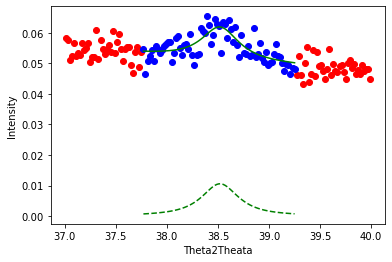

25SC_s1_0009.004.dat
(38.40065961951093, 0.018528787207024538)


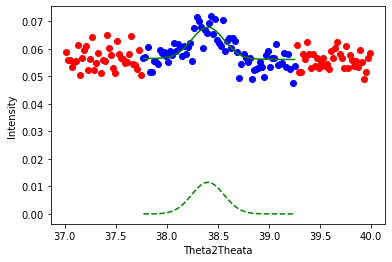

[0.00022907 0.00022258 0.00021117 0.00021588 0.00025199]


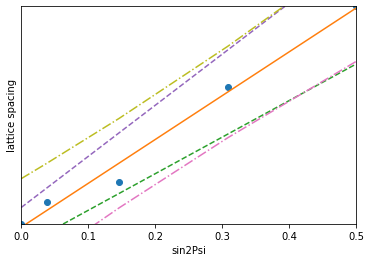

25SC_s1_0010.000.dat
(38.72535541805334, 0.008625311248668478)


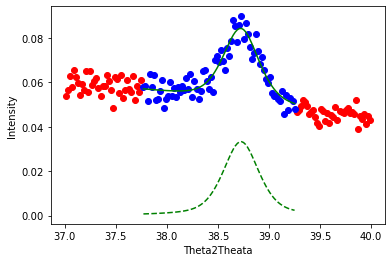

25SC_s1_0010.001.dat
(38.71075916789938, 0.01193485182278407)


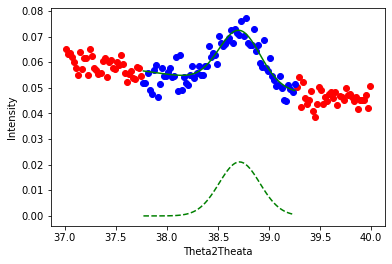

25SC_s1_0010.002.dat
(38.63725907526173, 0.014111303090821575)


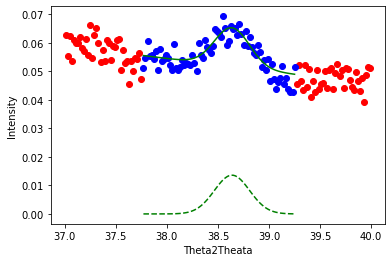

25SC_s1_0010.003.dat
(38.5261649138382, 0.02564431652643877)


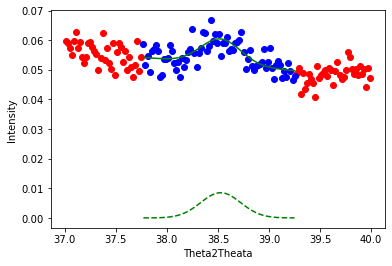

25SC_s1_0010.004.dat
(38.39607100630729, 0.03224807299036794)


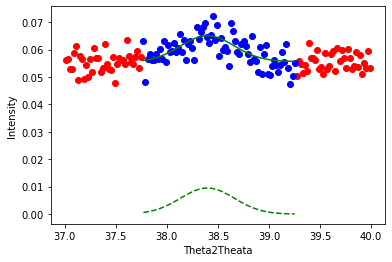

[6.25279302e-05 6.07547969e-05 5.76405190e-05 5.89274384e-05
 6.87827219e-05]


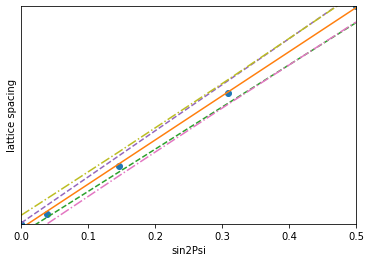

25SC_s1_0011.000.dat
(38.731117002064074, 0.006717186049130451)


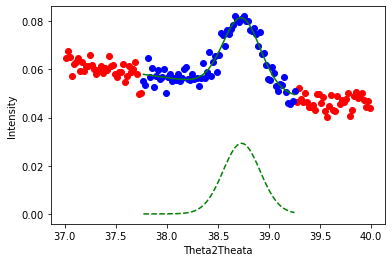

25SC_s1_0011.001.dat
(38.70137532339636, 0.008113697665771366)


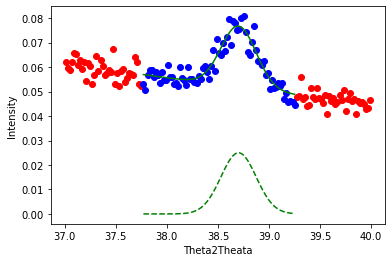

25SC_s1_0011.002.dat
(38.64537655636588, 0.01987087180500199)


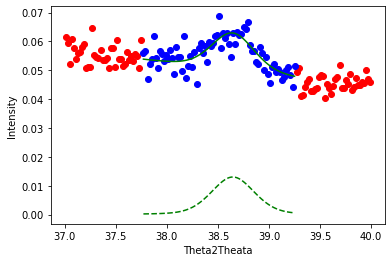

25SC_s1_0011.003.dat
(38.53928126101616, 0.027088567787674357)


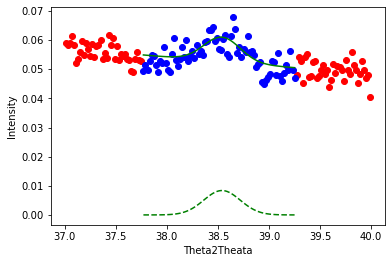

25SC_s1_0011.004.dat
(38.412420319823454, 0.019060293581152604)


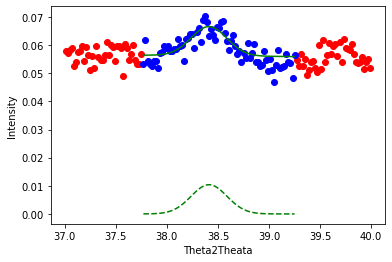

[7.09629480e-05 6.89506189e-05 6.54162250e-05 6.68767498e-05
 7.80615111e-05]


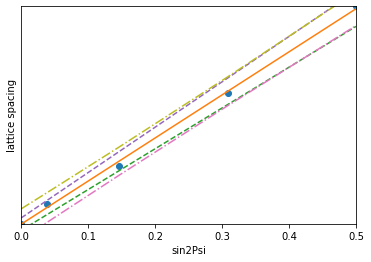

25SC_s1_0012.000.dat
(38.73013456625844, 0.007470309004964888)


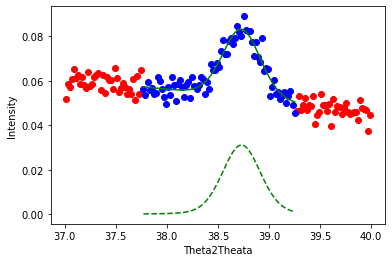

25SC_s1_0012.001.dat
(38.70421836102992, 0.008395142042364249)


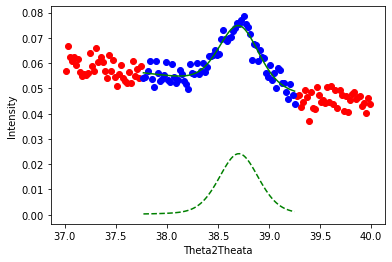

25SC_s1_0012.002.dat
(38.66045383648565, 0.019205389136190597)


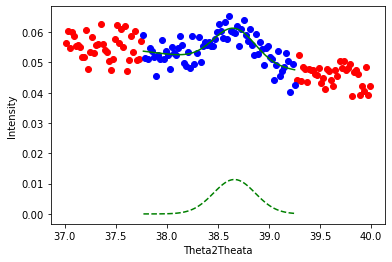

25SC_s1_0012.003.dat
(38.53745937903494, 0.019532475226765666)


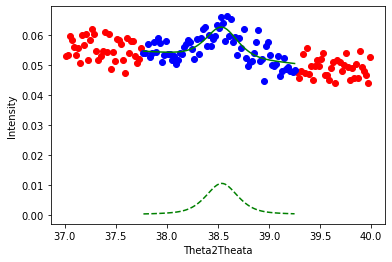

25SC_s1_0012.004.dat
(38.43020129059746, 0.015830076047817134)


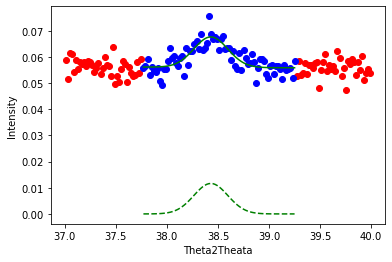

[0.00013516 0.00013133 0.00012459 0.00012738 0.00014868]


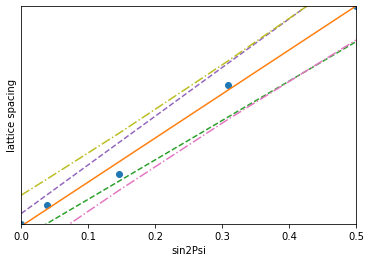

25SC_s1_0013.000.dat
(38.7387322942079, 0.007966594143611875)


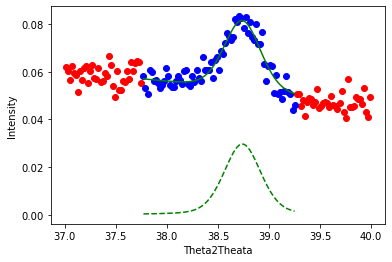

25SC_s1_0013.001.dat
(38.713274482306176, 0.010676206727532082)


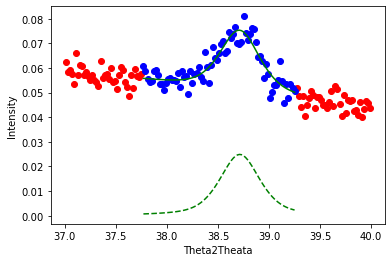

25SC_s1_0013.002.dat
(38.618316836650905, 0.018413501424371634)


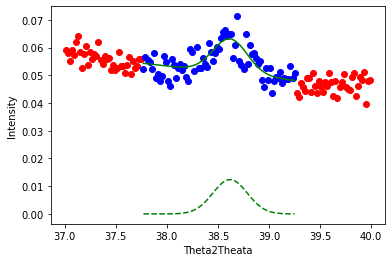

25SC_s1_0013.003.dat
(38.56349091573892, 0.021312529552526813)


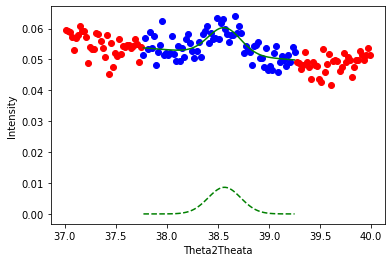

25SC_s1_0013.004.dat
(38.44186076830629, 0.01756676527873947)


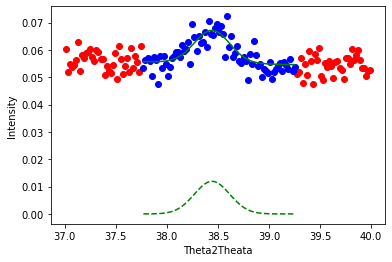

[0.00021548 0.00020937 0.00019864 0.00020307 0.00023704]


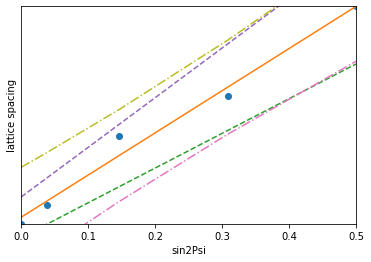

25SC_s1_0014.000.dat
(38.72600639037269, 0.00979487031583095)


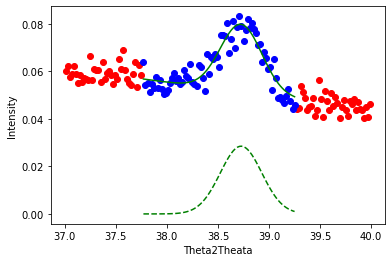

25SC_s1_0014.001.dat
(38.70859173041833, 0.01073002905560745)


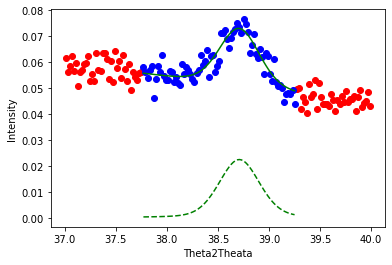

25SC_s1_0014.002.dat
(38.643118865694426, 0.017420489827217667)


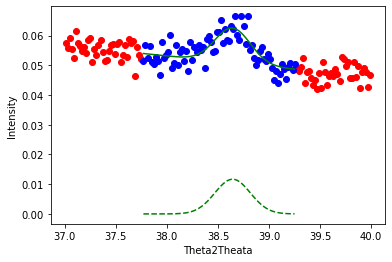

25SC_s1_0014.003.dat
(38.4504535468446, 0.03778588068006138)


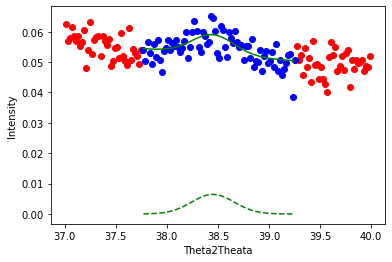

25SC_s1_0014.004.dat
(38.425352432748596, 0.02232653527950035)


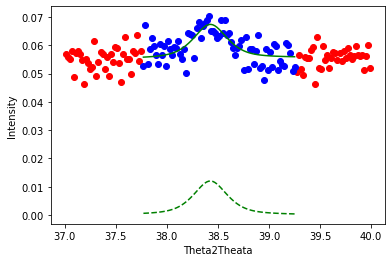

[0.00054627 0.00053078 0.00050357 0.00051481 0.00060091]


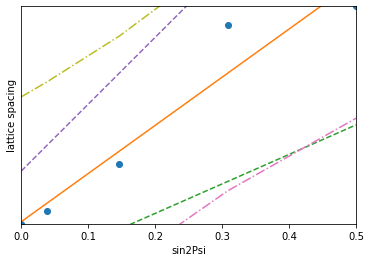

25SC_s1_0015.000.dat
(38.72501825083818, 0.008912068361837899)


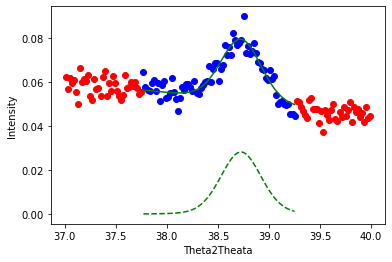

25SC_s1_0015.001.dat
(38.71468455868436, 0.011269452239225465)


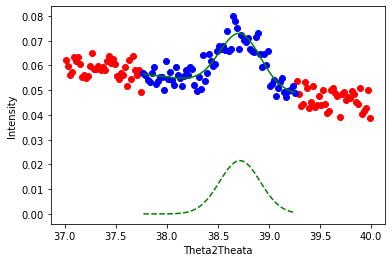

25SC_s1_0015.002.dat
(38.63745721427661, 0.016124588396548508)


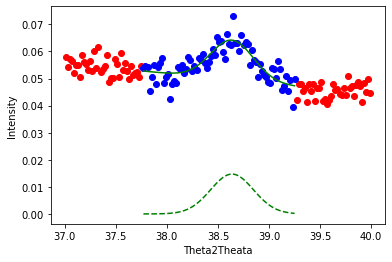

25SC_s1_0015.003.dat
(38.551560696735606, 0.026127823842716048)


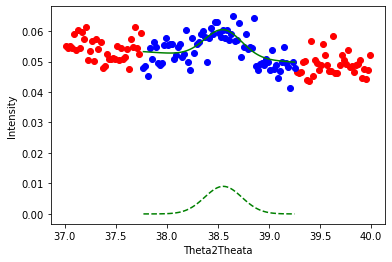

25SC_s1_0015.004.dat
(38.405441583183745, 0.021322253526827498)


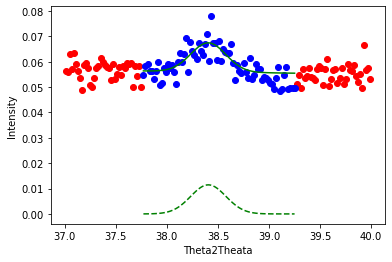

[0.00014488 0.00014077 0.00013356 0.00013654 0.00015937]


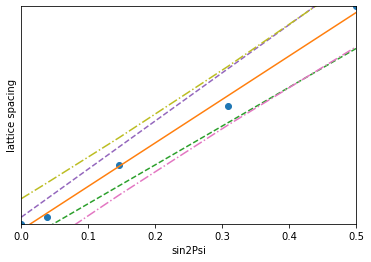

25SC_s1_0016.000.dat
(38.72003783297017, 0.008941373207305007)


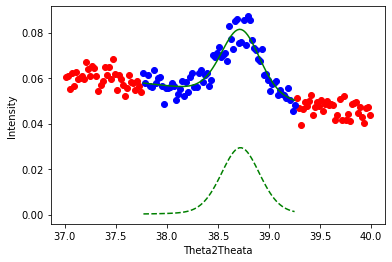

25SC_s1_0016.001.dat
(38.71451502423623, 0.011034634792095334)


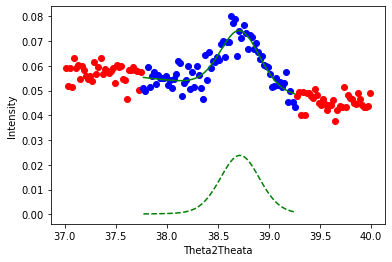

25SC_s1_0016.002.dat
(38.598630095987886, 0.017174006787238724)


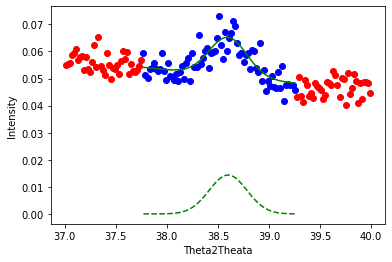

25SC_s1_0016.003.dat
(38.48945522407046, 0.023408387125192207)


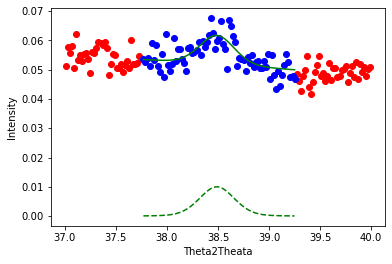

25SC_s1_0016.004.dat
(38.41928971525813, 0.02695650374881292)


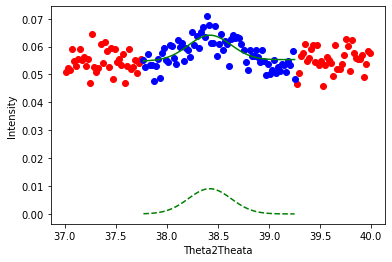

[0.00034289 0.00033316 0.00031609 0.00032314 0.00037719]


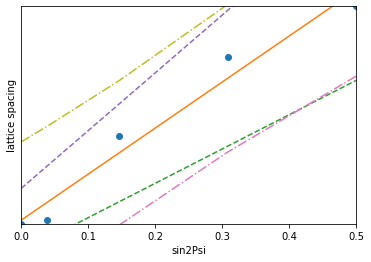

25SC_s1_0017.000.dat
(38.714419199330756, 0.009838260255190854)


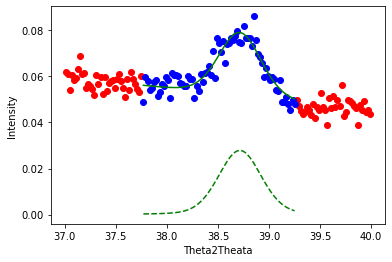

25SC_s1_0017.001.dat
(38.6800999875849, 0.01041607388192568)


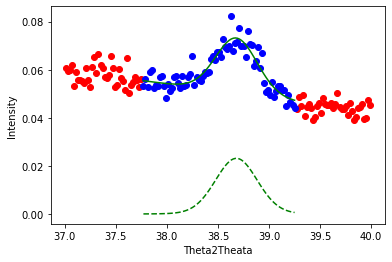

25SC_s1_0017.002.dat
(38.62306580254518, 0.016700968132874448)


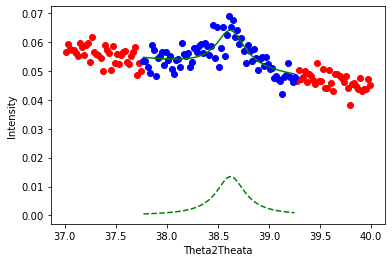

25SC_s1_0017.003.dat
(38.48356909388109, 0.02529650238148846)


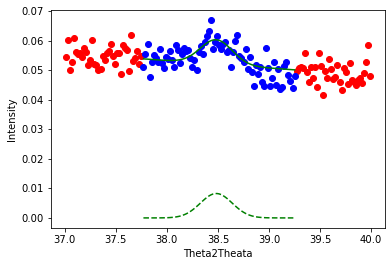

25SC_s1_0017.004.dat
(38.40339367300226, 0.017984591474472025)


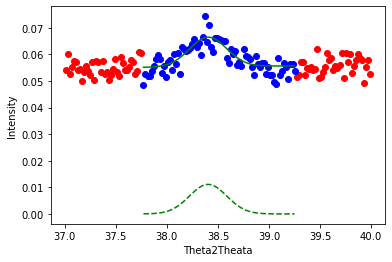

[0.00022775 0.0002213  0.00020995 0.00021464 0.00025054]


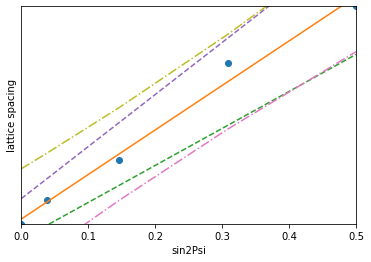

25SC_s1_0018.000.dat
(38.67741159844107, 0.009602334730825189)


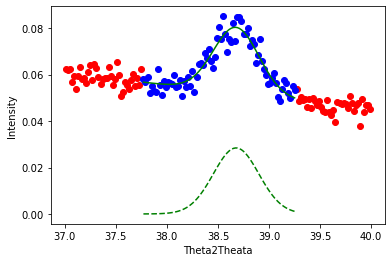

25SC_s1_0018.001.dat
(38.652124810220975, 0.01216106266254144)


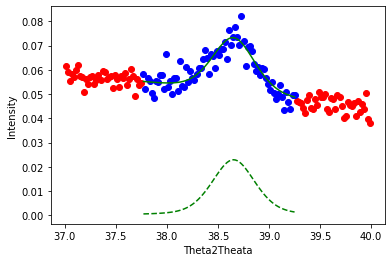

25SC_s1_0018.002.dat
(38.58587116342372, 0.0164975748330318)


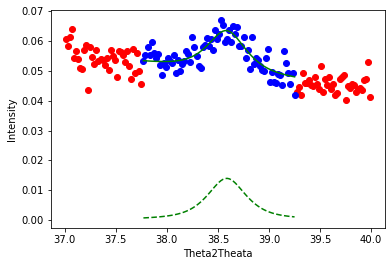

25SC_s1_0018.003.dat
(38.51370218753673, 0.020365242032954558)


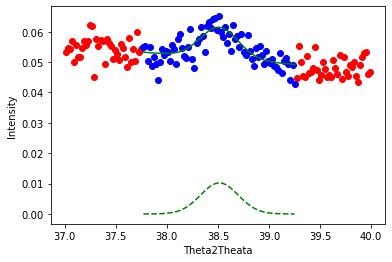

25SC_s1_0018.004.dat
(38.407180312323916, 0.016361032488028924)


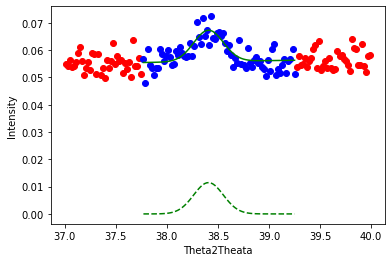

[7.79176367e-05 7.57080904e-05 7.18273099e-05 7.34309727e-05
 8.57118910e-05]


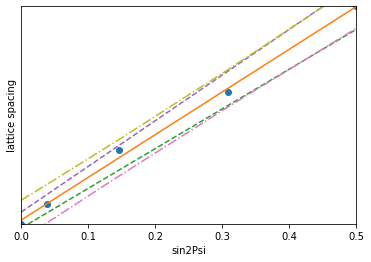

25SC_s1_0019.000.dat
(38.65450677088612, 0.007901252407648529)


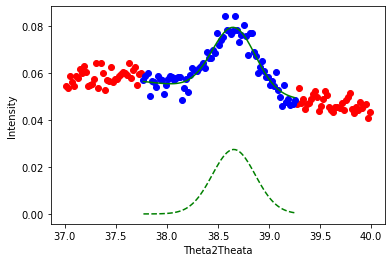

25SC_s1_0019.001.dat
(38.65452159540159, 0.010029953953827655)


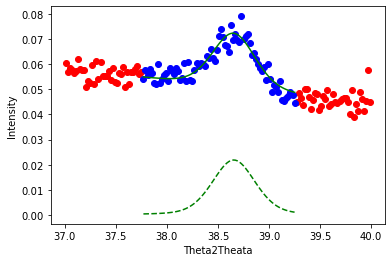

25SC_s1_0019.002.dat
(38.59216589015437, 0.022493211524819257)


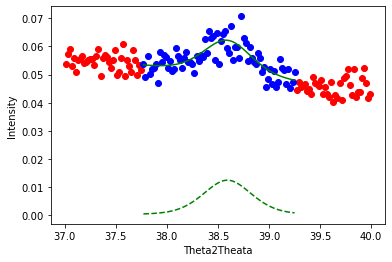

25SC_s1_0019.003.dat
(38.50020815759931, 0.020654522940126804)


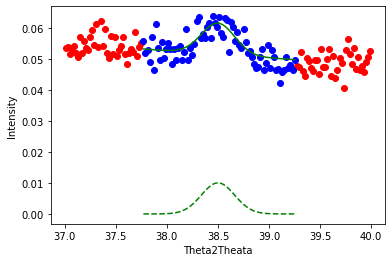

25SC_s1_0019.004.dat
(38.41726380816695, 0.02430504727654651)


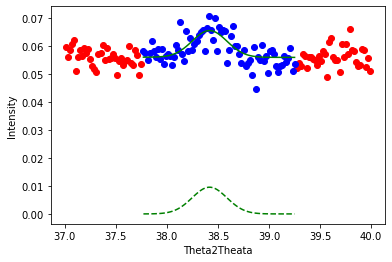

[0.00011541 0.00011214 0.00010639 0.00010876 0.00012695]


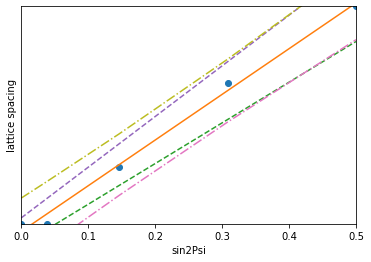

25SC_s1_0020.000.dat
(38.62280730712383, 0.010046079712417742)


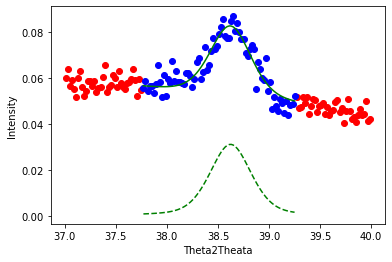

25SC_s1_0020.001.dat
(38.62612354806509, 0.008716817889355436)


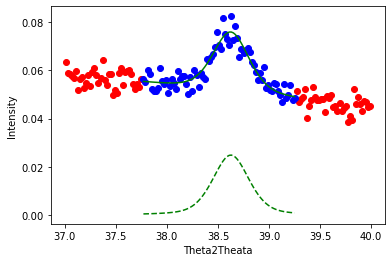

25SC_s1_0020.002.dat
(38.53916263053639, 0.012213064420433765)


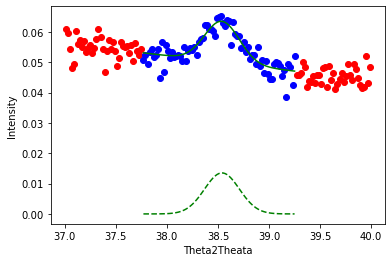

25SC_s1_0020.003.dat
(38.50158980747723, 0.0171354565132779)


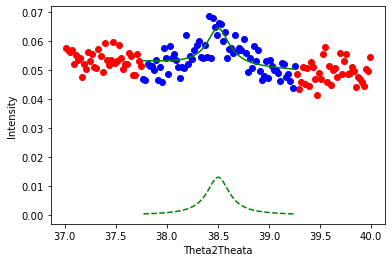

25SC_s1_0020.004.dat
(38.39791167493278, 0.02075038552564487)


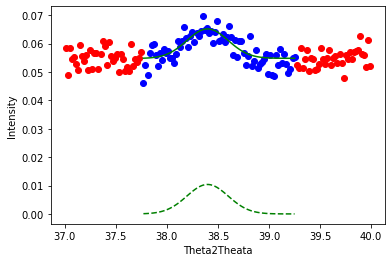

[0.00021569 0.00020957 0.00019883 0.00020327 0.00023726]


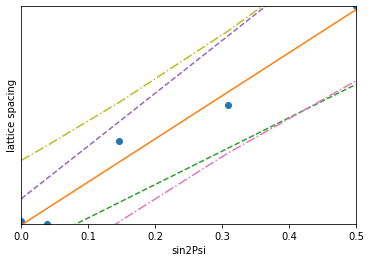

25SC_s1_0021.000.dat
(38.6195841199304, 0.007350285720261686)


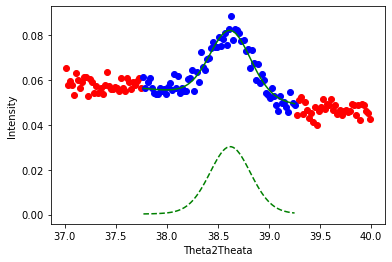

25SC_s1_0021.001.dat
(38.61319345799018, 0.00827667071537166)


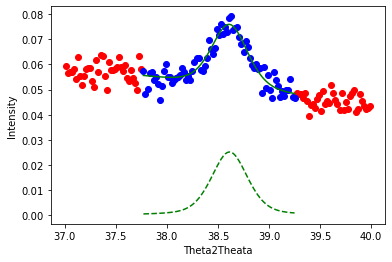

25SC_s1_0021.002.dat
(38.560838729537096, 0.013618289763773824)


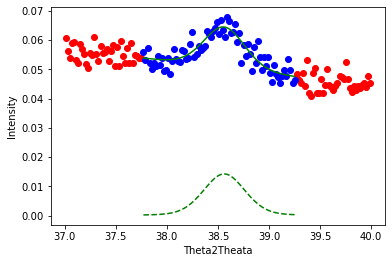

25SC_s1_0021.003.dat
(38.498448572724925, 0.01869928508425027)


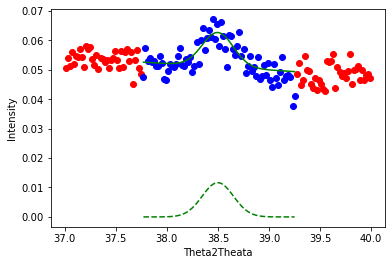

25SC_s1_0021.004.dat
(38.42038106241092, 0.022430367449919317)


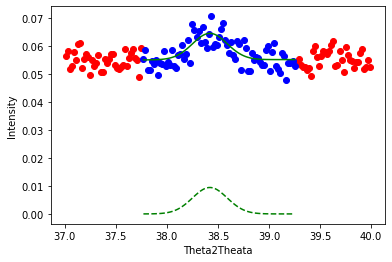

[4.97567100e-05 4.83457360e-05 4.58675440e-05 4.68916123e-05
 5.47339714e-05]


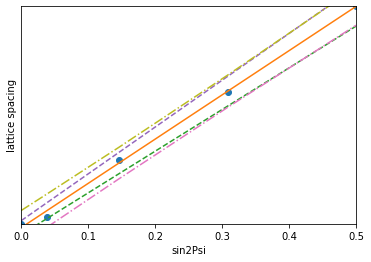

25SC_s1_0022.000.dat
(38.6276565718038, 0.009096385867392814)


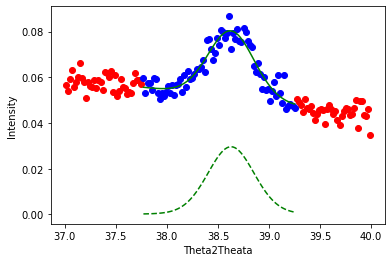

25SC_s1_0022.001.dat
(38.58139075443619, 0.010467550940455943)


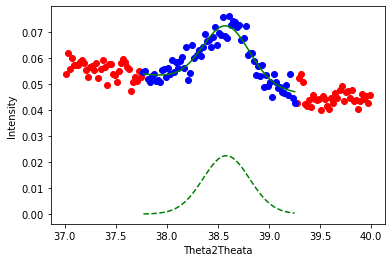

25SC_s1_0022.002.dat
(38.56101130036752, 0.017285134234493064)


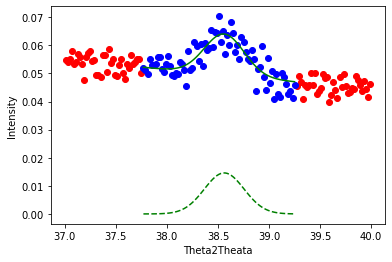

25SC_s1_0022.003.dat
(38.501565500262224, 0.028073115873068853)


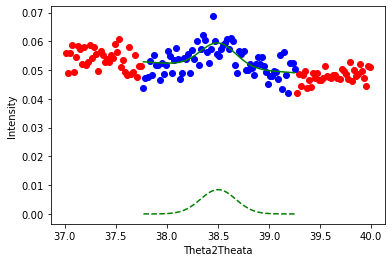

25SC_s1_0022.004.dat
(38.431098382542494, 0.013620526055293264)


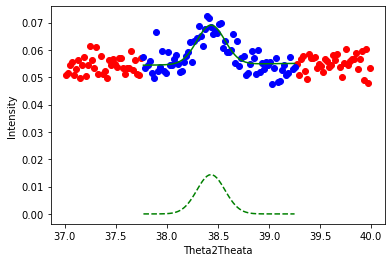

[0.00016006 0.00015552 0.00014755 0.00015085 0.00017608]


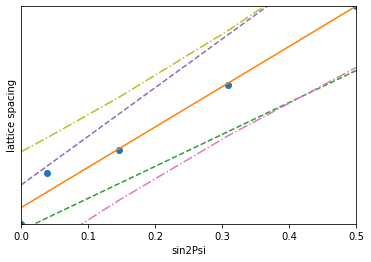

25SC_s1_0023.000.dat
(38.605979005520965, 0.010705174401521965)


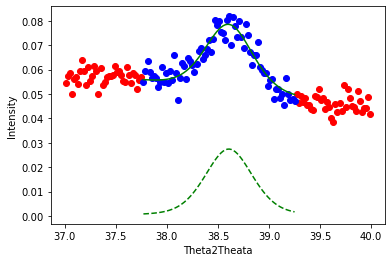

25SC_s1_0023.001.dat
(38.59384149008837, 0.011002859587857277)


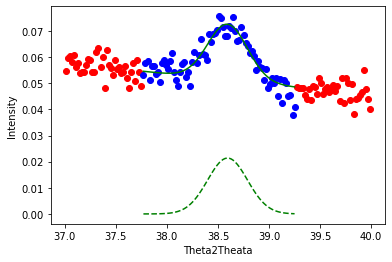

25SC_s1_0023.002.dat
(38.555653991999144, 0.01791025941976757)


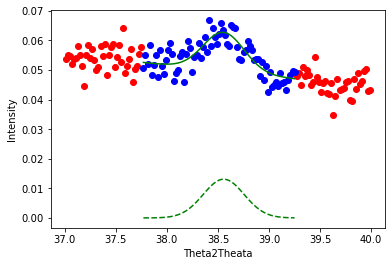

25SC_s1_0023.003.dat
(38.501599577765134, 0.022423254076738126)


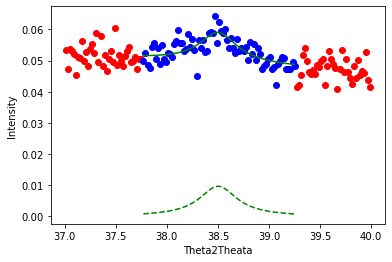

25SC_s1_0023.004.dat
(38.44854403549929, 0.013711528943689941)


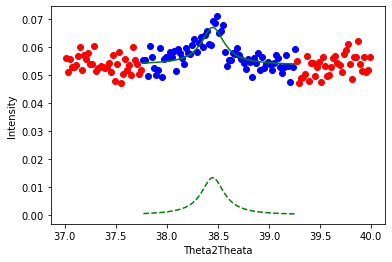

[4.36954840e-05 4.24563910e-05 4.02800855e-05 4.11794046e-05
 4.80664291e-05]


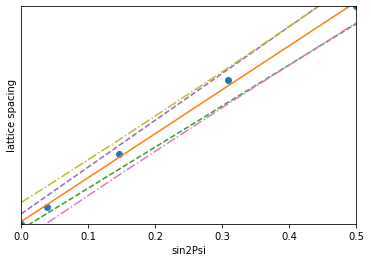

25SC_s1_0024.000.dat
(38.591402210209935, 0.008162580939942394)


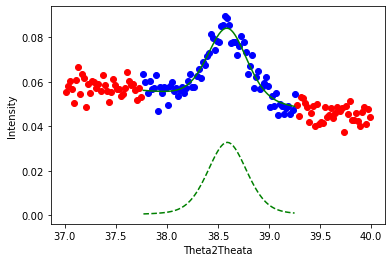

25SC_s1_0024.001.dat
(38.574910499951415, 0.010877068470856137)


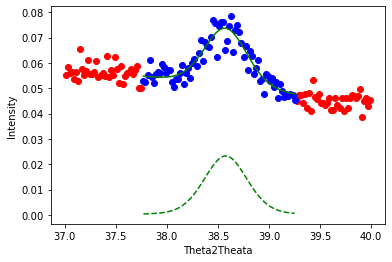

25SC_s1_0024.002.dat
(38.542665339576196, 0.01647049488364154)


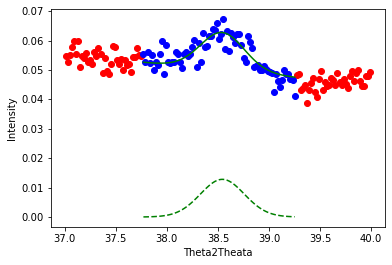

25SC_s1_0024.003.dat
(38.4634456790645, 0.01663929776548333)


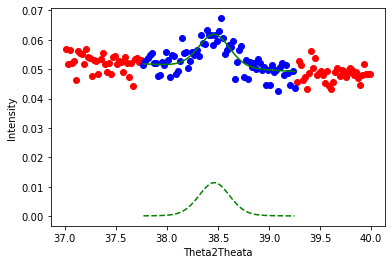

25SC_s1_0024.004.dat
(38.400158547287035, 0.02227979902165612)


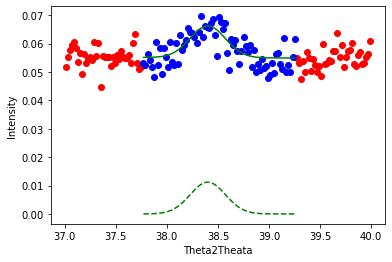

[8.31344256e-05 8.07769443e-05 7.66363355e-05 7.83473677e-05
 9.14505254e-05]


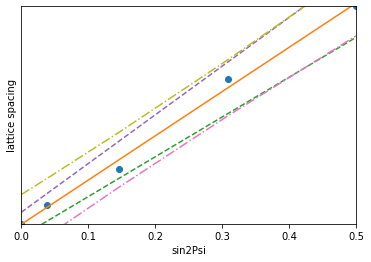

25SC_s1_0025.000.dat
(38.58946529310206, 0.0077541676507260114)


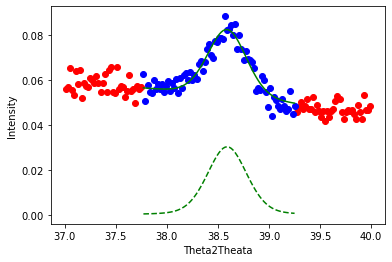

25SC_s1_0025.001.dat
(38.58456345913477, 0.010893958888244787)


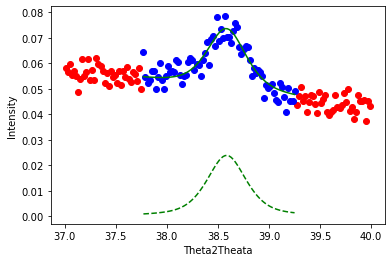

25SC_s1_0025.002.dat
(38.52585990786019, 0.014964945039685007)


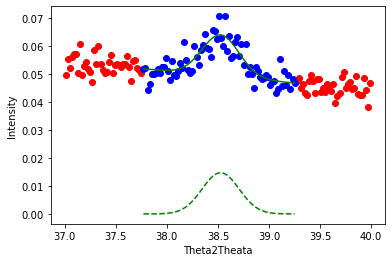

25SC_s1_0025.003.dat
(38.47315985897437, 0.027275124754775216)


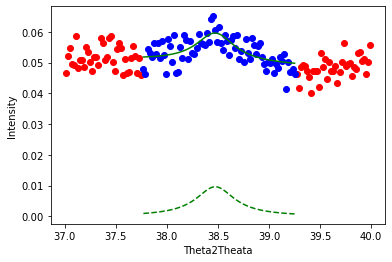

25SC_s1_0025.004.dat
(38.4056650473153, 0.020331892546049474)


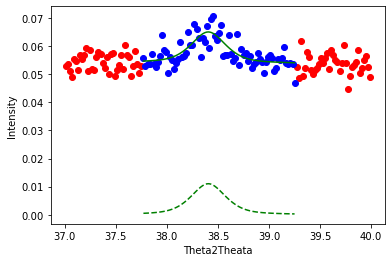

[9.11534290e-05 8.85685492e-05 8.40285444e-05 8.59046198e-05
 1.00271686e-04]


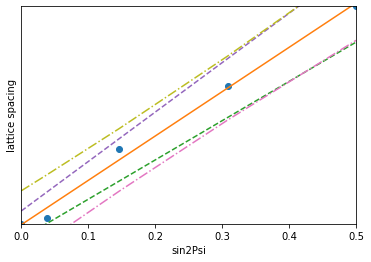

25SC_s1_0026.000.dat
(38.57385129941731, 0.007480132539817913)


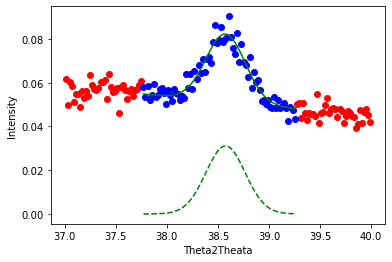

25SC_s1_0026.001.dat
(38.55577860025257, 0.01038101669483923)


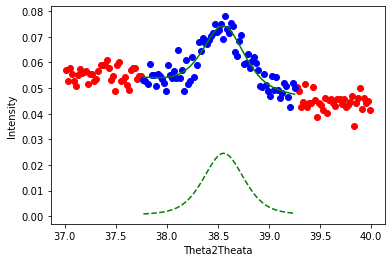

25SC_s1_0026.002.dat
(38.4906014686866, 0.016082389175137293)


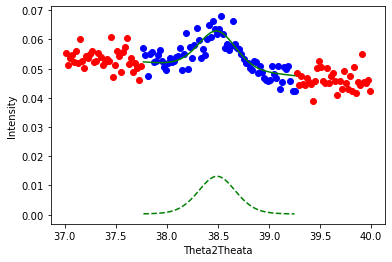

25SC_s1_0026.003.dat
(38.45195223164358, 0.019192339333914312)


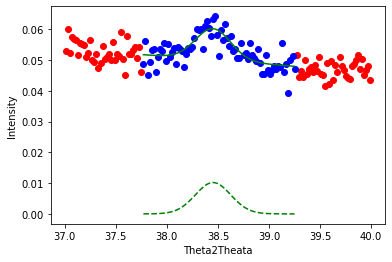

25SC_s1_0026.004.dat
(38.40733582523473, 0.0209316488875566)


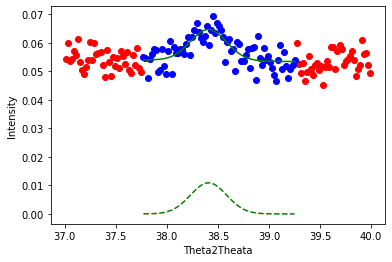

[0.00020671 0.00020085 0.00019056 0.00019481 0.00022739]


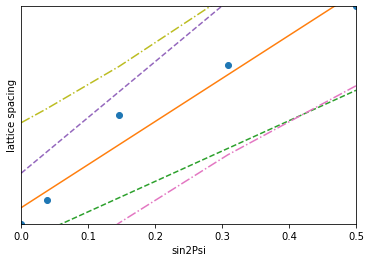

25SC_s1_0027.000.dat
(38.579877169213574, 0.00961597290604574)


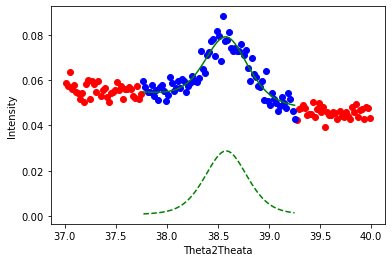

25SC_s1_0027.001.dat
(38.553508670616225, 0.010914098219498574)


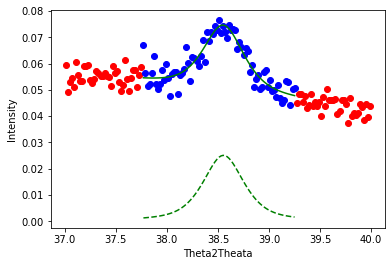

25SC_s1_0027.002.dat
(38.551747579083035, 0.017071077929246666)


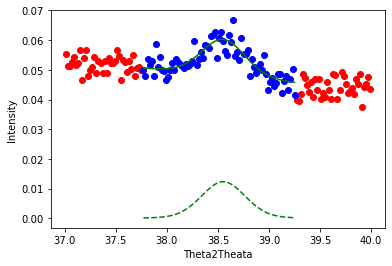

25SC_s1_0027.003.dat
(38.428656529426036, 0.01580155696850604)


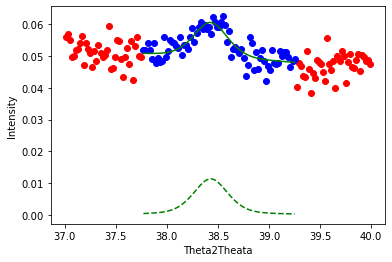

25SC_s1_0027.004.dat
(38.402019597649385, 0.019281939142567598)


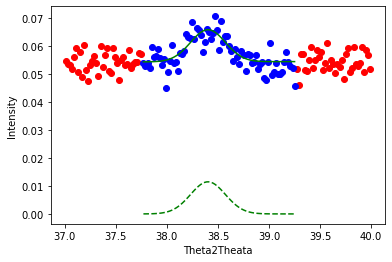

[0.0003266  0.00031734 0.00030108 0.0003078  0.00035928]


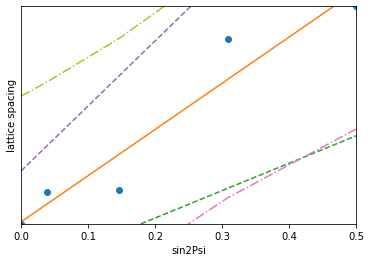

25SC_s1_0028.000.dat
(38.56596611912045, 0.007602821207699022)


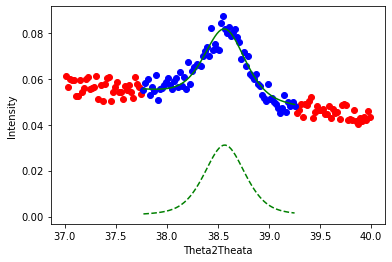

25SC_s1_0028.001.dat
(38.55826446792082, 0.011771032795916986)


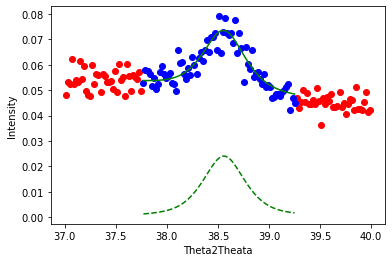

25SC_s1_0028.002.dat
(38.54051773787414, 0.020397278330582035)


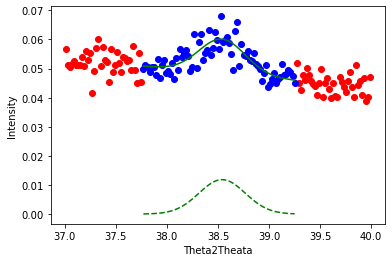

25SC_s1_0028.003.dat
(38.45162067749291, 0.028434292031578406)


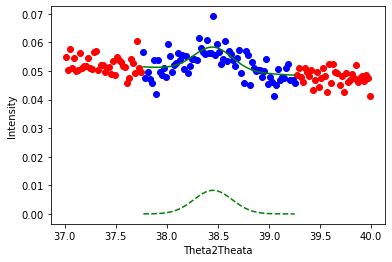

25SC_s1_0028.004.dat
(38.43370514968171, 0.018119473340760816)


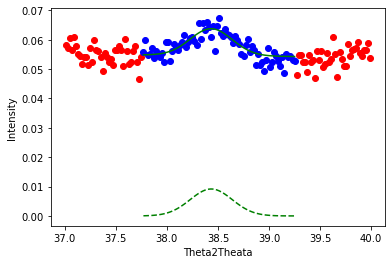

[0.00022784 0.00022138 0.00021003 0.00021472 0.00025063]


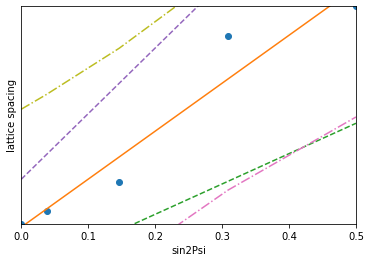

25SC_s1_0029.000.dat
(38.55683584238302, 0.00822313492386415)


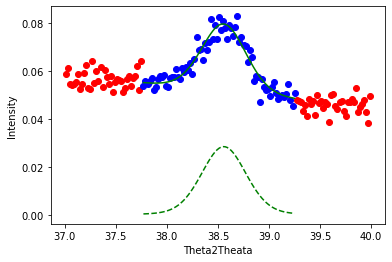

25SC_s1_0029.001.dat
(38.540746594588754, 0.010610734012542134)


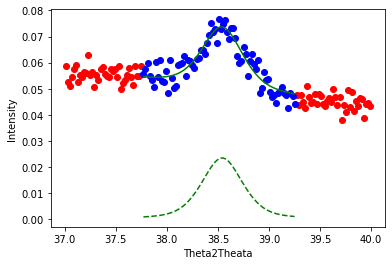

25SC_s1_0029.002.dat
(38.509855989296376, 0.01842464388870873)


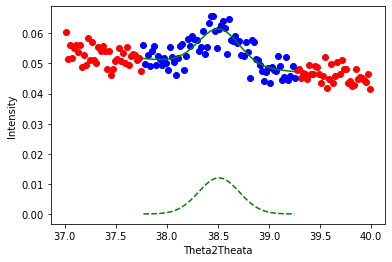

25SC_s1_0029.003.dat
(38.4226497423975, 0.022621436018303565)


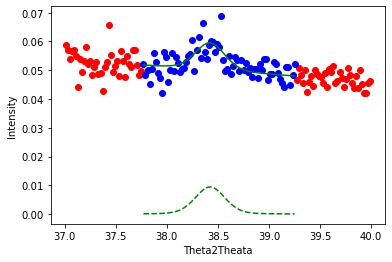

25SC_s1_0029.004.dat
(38.37532613883103, 0.0209348059452992)


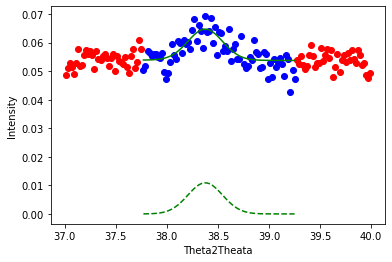

[0.00014515 0.00014104 0.00013381 0.00013679 0.00015967]


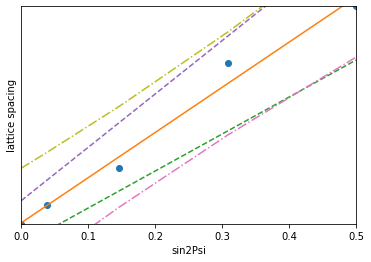

25SC_s1_0030.000.dat
(38.54954704565728, 0.00989589165856056)


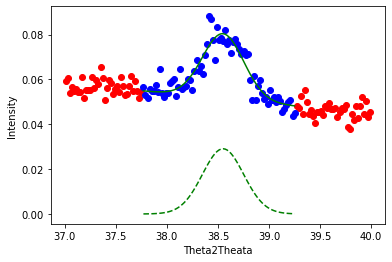

25SC_s1_0030.001.dat
(38.54150793411703, 0.009704361698674563)


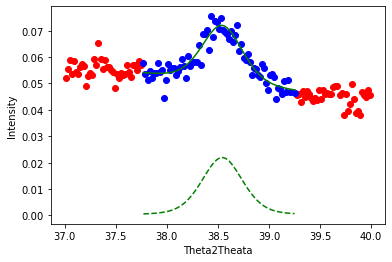

25SC_s1_0030.002.dat
(38.48536035387088, 0.015161350171363545)


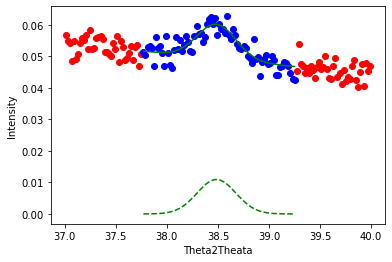

25SC_s1_0030.003.dat
(38.496555611032505, 0.017967329529251914)


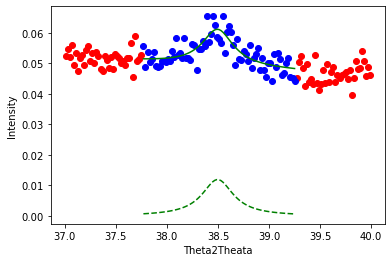

25SC_s1_0030.004.dat
(38.42658077728691, 0.015314782879054658)


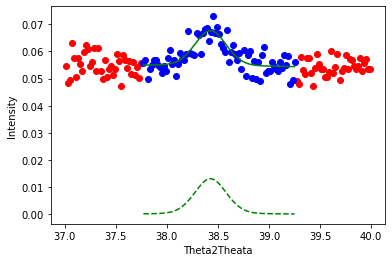

[0.00024531 0.00023835 0.00022613 0.00023118 0.00026985]


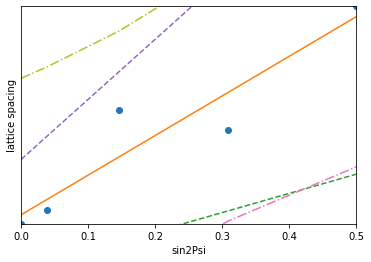

25SC_s1_0031.000.dat
(38.564072161221965, 0.007357327694273424)


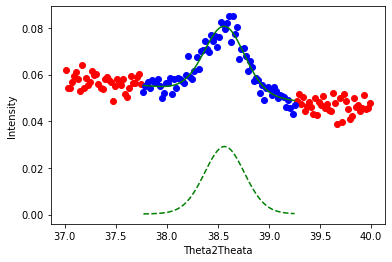

25SC_s1_0031.001.dat
(38.548492742521404, 0.012010750616912789)


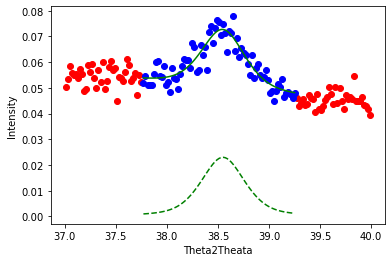

25SC_s1_0031.002.dat
(38.49520673984377, 0.015253614025358157)


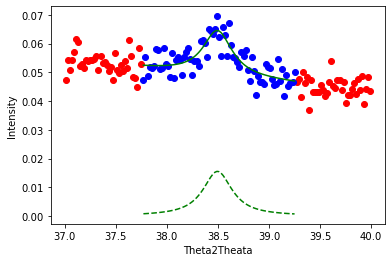

25SC_s1_0031.003.dat
(38.41318448043102, 0.018776577844472953)


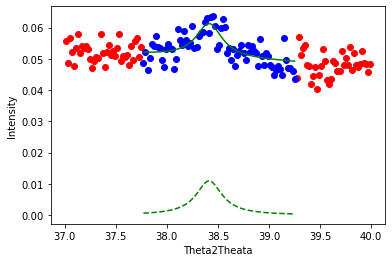

25SC_s1_0031.004.dat
(38.42480111454279, 0.02733480411950874)


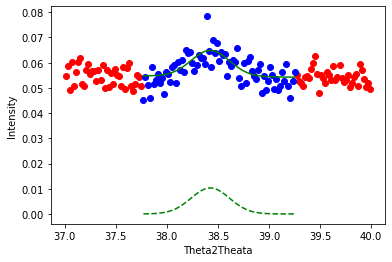

[0.00038061 0.00036981 0.00035086 0.00035869 0.00041868]


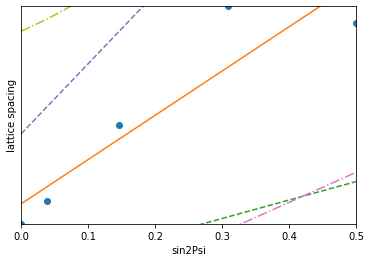

25SC_s1_0032.000.dat
(38.5459289552989, 0.007283607102701167)


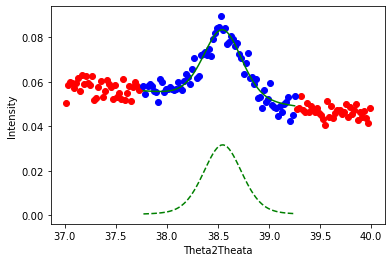

25SC_s1_0032.001.dat
(38.5336953974625, 0.010132681866104127)


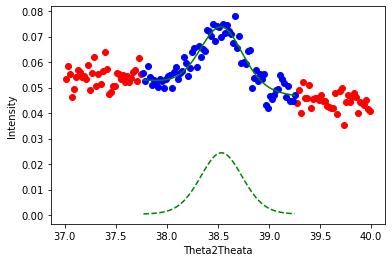

25SC_s1_0032.002.dat
(38.507143082567524, 0.01575587425994344)


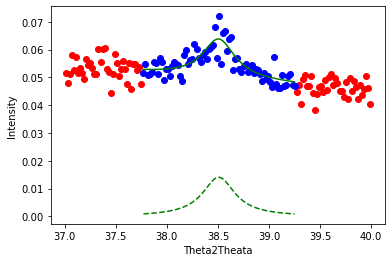

25SC_s1_0032.003.dat
(38.43721394239197, 0.030520755046821096)


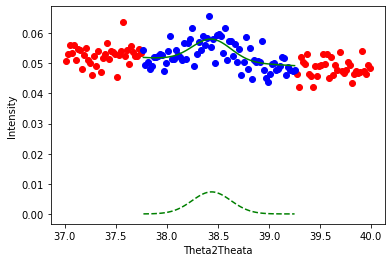

25SC_s1_0032.004.dat
(38.40766009294993, 0.012367855485684144)


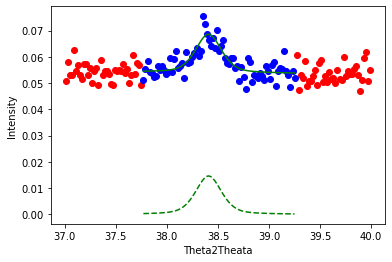

[0.00014109 0.00013709 0.00013006 0.00013297 0.0001552 ]


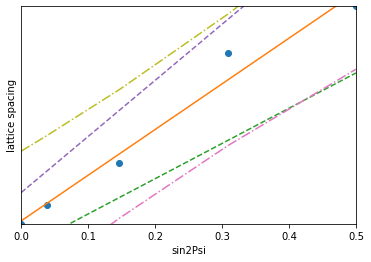

25SC_s1_0033.000.dat
(38.54904846997056, 0.008695504178741872)


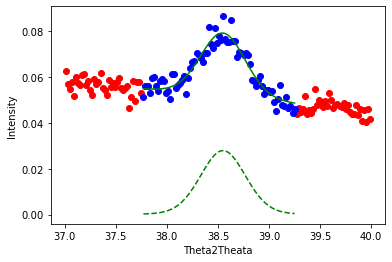

25SC_s1_0033.001.dat
(38.52645832980308, 0.012128999888316188)


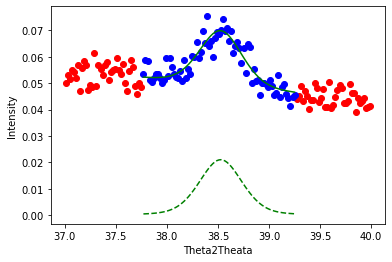

25SC_s1_0033.002.dat
(38.476320846863416, 0.016807612699525493)


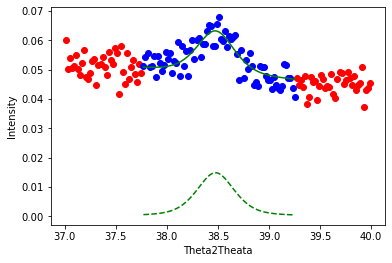

25SC_s1_0033.003.dat
(38.406657210136764, 0.016351336552469294)


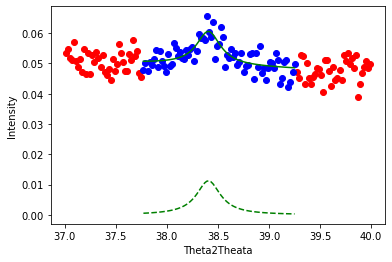

25SC_s1_0033.004.dat
(38.357453491996864, 0.017512140938108826)


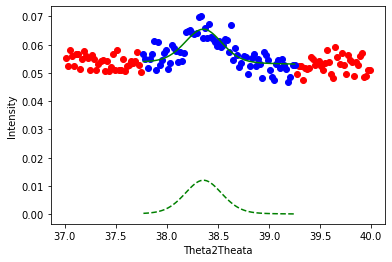

[0.00014631 0.00014216 0.00013487 0.00013788 0.00016094]


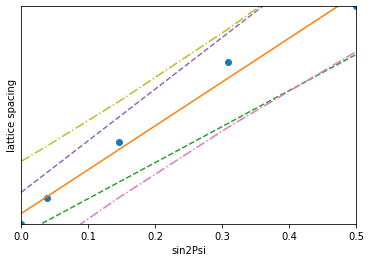

25SC_s1_0034.000.dat
(38.535948207488865, 0.008731633024553261)


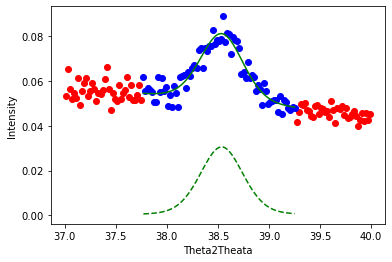

25SC_s1_0034.001.dat
(38.51212904574145, 0.008511650925267554)


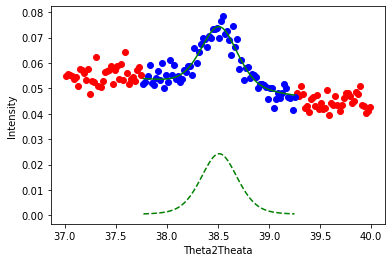

25SC_s1_0034.002.dat
(38.49195644658398, 0.014150770582751071)


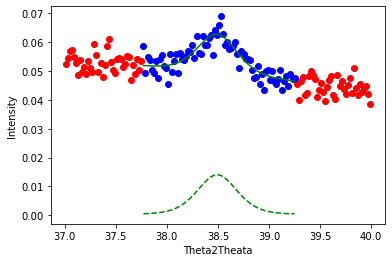

25SC_s1_0034.003.dat
(38.44601065558378, 0.016802169195843483)


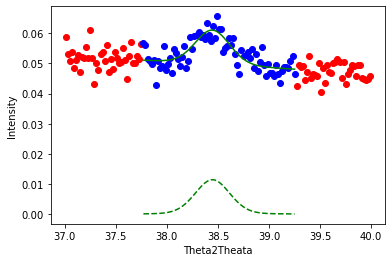

25SC_s1_0034.004.dat
(38.394936564690845, 0.016480469159089888)


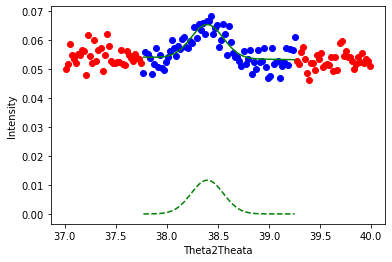

[6.80454482e-05 6.61158521e-05 6.27267677e-05 6.41272459e-05
 7.48521681e-05]


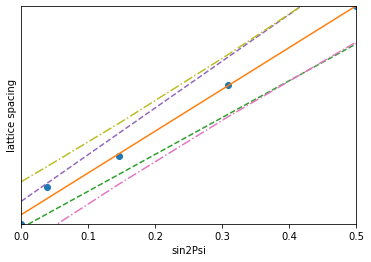

25SC_s1_0035.000.dat
(38.51802647842689, 0.008411120555021589)


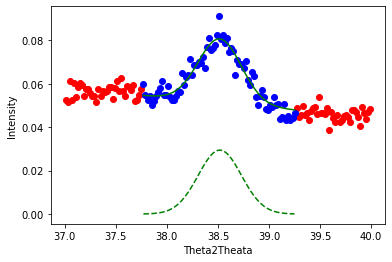

25SC_s1_0035.001.dat
(38.516782248784814, 0.009316116335471473)


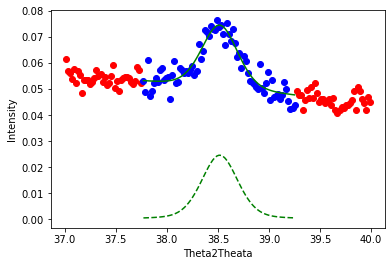

25SC_s1_0035.002.dat
(38.47751540941515, 0.017000275774970184)


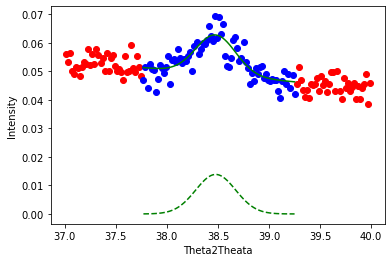

25SC_s1_0035.003.dat
(38.468881084774885, 0.01884402327578919)


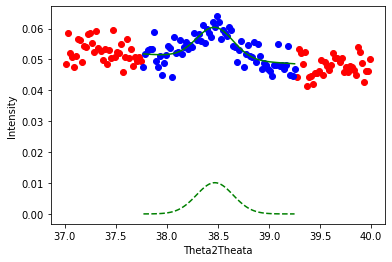

25SC_s1_0035.004.dat
(38.42389281929652, 0.01566825980393984)


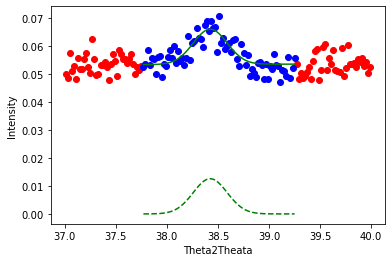

[0.00011672 0.00011341 0.00010759 0.00011    0.00012839]


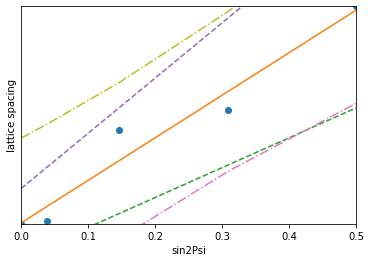

25SC_s1_0036.000.dat
(38.52141615184319, 0.00939689360477753)


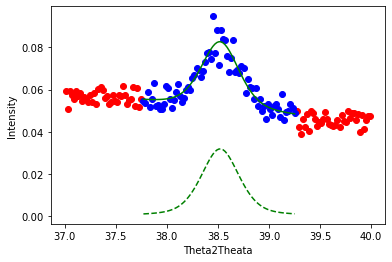

25SC_s1_0036.001.dat
(38.52163086297452, 0.00955031164193923)


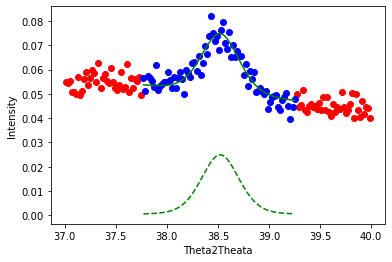

25SC_s1_0036.002.dat
(38.486670678112326, 0.01474276850428217)


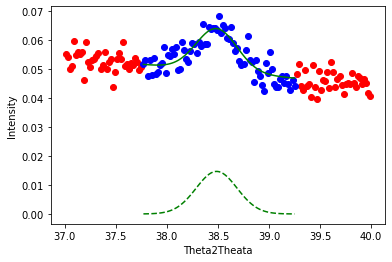

25SC_s1_0036.003.dat
(38.45090522772407, 0.019982006511906663)


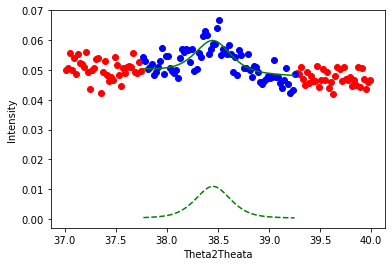

25SC_s1_0036.004.dat
(38.40669818655236, 0.013958266805100735)


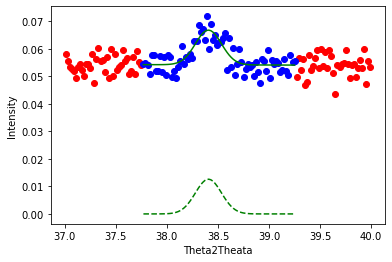

[5.29046450e-05 5.14044036e-05 4.87694249e-05 4.98582825e-05
 5.81968006e-05]


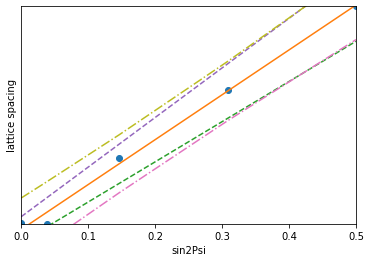

25SC_s1_0037.000.dat
(38.53426507500142, 0.006987160636696989)


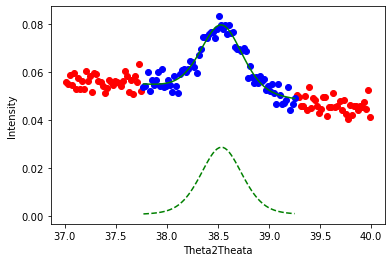

25SC_s1_0037.001.dat
(38.49961600124494, 0.008914473591841226)


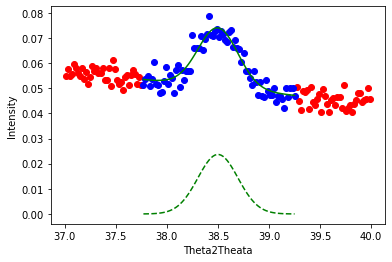

25SC_s1_0037.002.dat
(38.47372226881138, 0.012526156856105131)


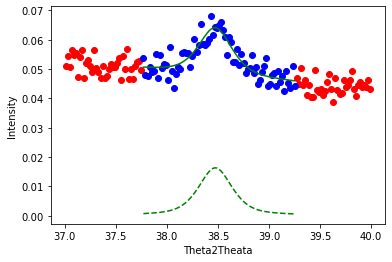

25SC_s1_0037.003.dat
(38.47129894285171, 0.020007045125792332)


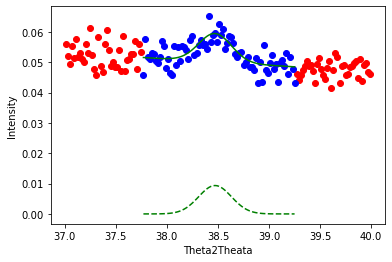

25SC_s1_0037.004.dat
(38.451463264952764, 0.018904031026309494)


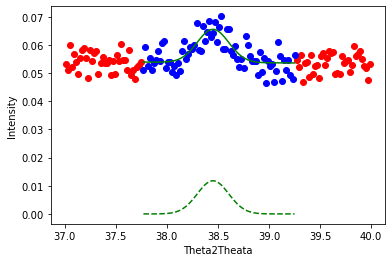

[0.00021345 0.0002074  0.00019677 0.00020116 0.0002348 ]


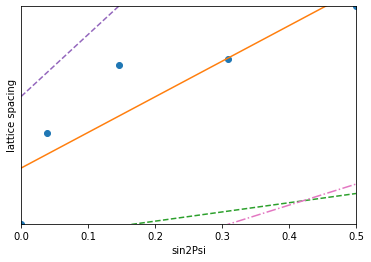

25SC_s1_0038.000.dat
(38.507311834954514, 0.006901005661267199)


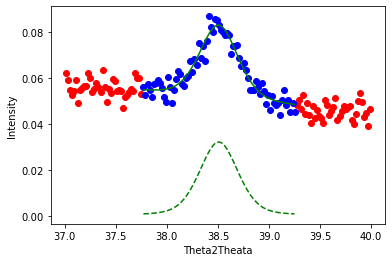

25SC_s1_0038.001.dat
(38.50294264891506, 0.009320567528916515)


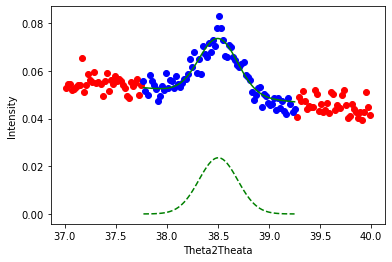

25SC_s1_0038.002.dat
(38.49423614274974, 0.015794045876436163)


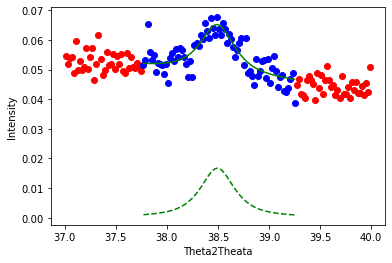

25SC_s1_0038.003.dat
(38.48812295298873, 0.018986759492124215)


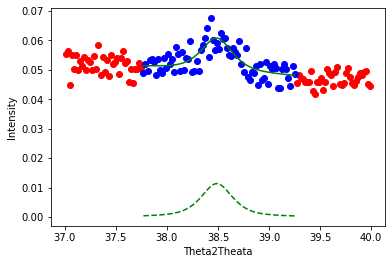

25SC_s1_0038.004.dat
(38.47314490920201, 0.016112650931383032)


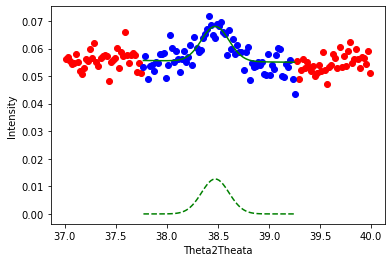

[2.41336967e-05 2.34493263e-05 2.22473189e-05 2.27440269e-05
 2.65478378e-05]


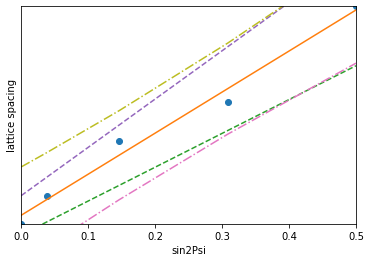

25SC_s1_0039.000.dat
(38.50144054451954, 0.008303575317168457)


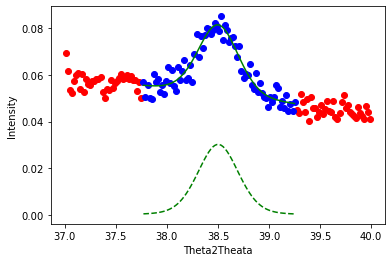

25SC_s1_0039.001.dat
(38.494501404852706, 0.010420397801741976)


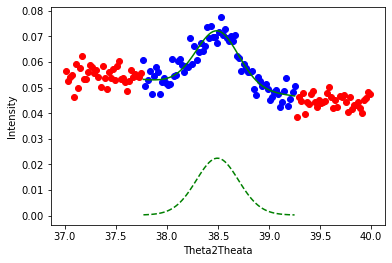

25SC_s1_0039.002.dat
(38.50034290067423, 0.015535956855118715)


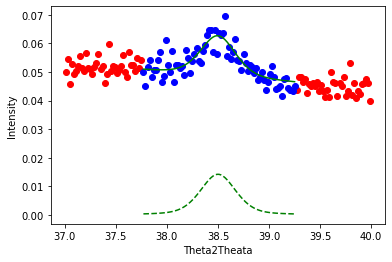

25SC_s1_0039.003.dat
(38.46011549684531, 0.019589374455651756)


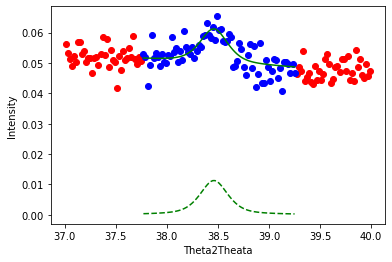

25SC_s1_0039.004.dat
(38.46968340776846, 0.016925190494593366)


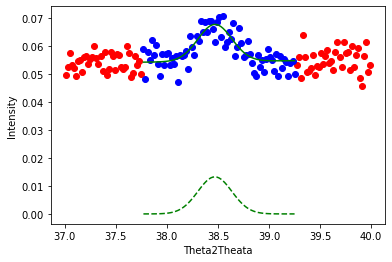

[0.00015134 0.00014705 0.00013951 0.00014263 0.00016648]


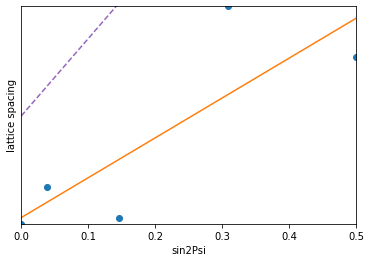

25SC_s1_0040.000.dat
(38.49165950298439, 0.00788147874204592)


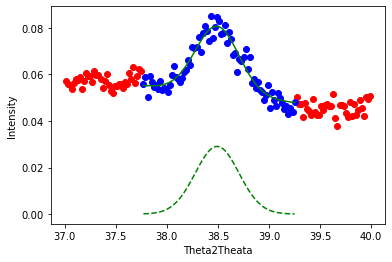

25SC_s1_0040.001.dat
(38.494321143231936, 0.010439241070977557)


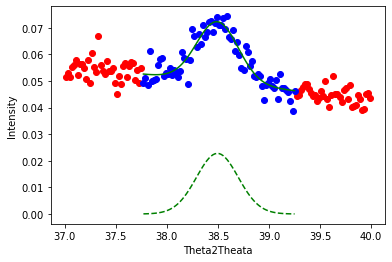

25SC_s1_0040.002.dat
(38.47817238681107, 0.01290338031099388)


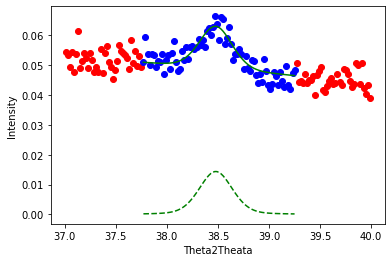

25SC_s1_0040.003.dat
(38.50798795488482, 0.021576453655049968)


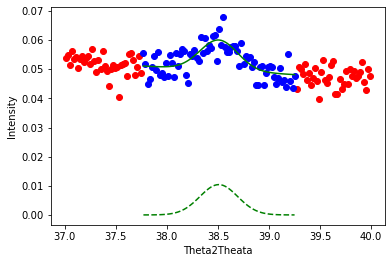

25SC_s1_0040.004.dat
(38.499217709821565, 0.016983672630973785)


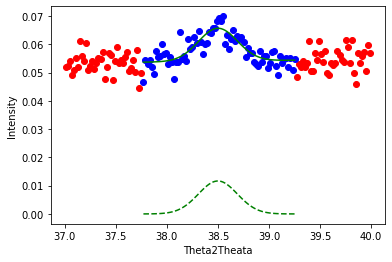

[0.00013396 0.00013016 0.00012348 0.00012624 0.00014736]


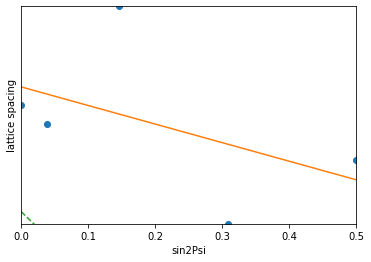

25SC_s1_0041.000.dat
(38.48235073369241, 0.006372466173926305)


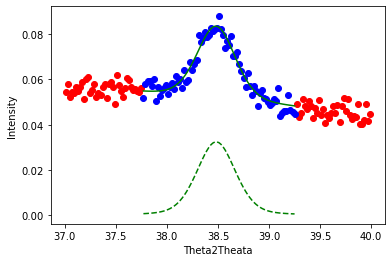

25SC_s1_0041.001.dat
(38.488682170736524, 0.01027248870155491)


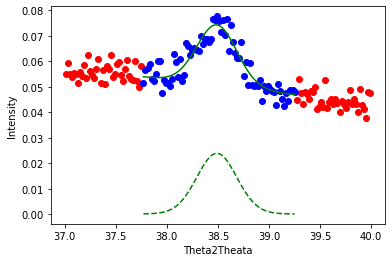

25SC_s1_0041.002.dat
(38.47379537085979, 0.012941472857662322)


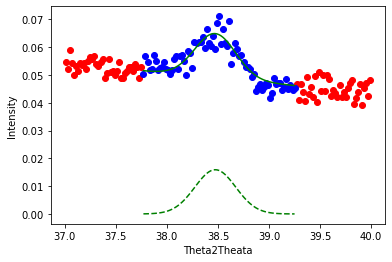

25SC_s1_0041.003.dat
(38.5121672908452, 0.01696887512876216)


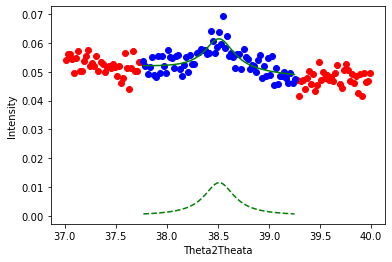

25SC_s1_0041.004.dat
(38.50779727177117, 0.015671756935539422)


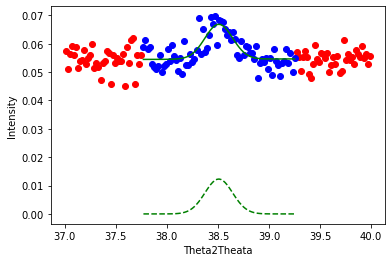

[0.00014929 0.00014505 0.00013762 0.00014069 0.00016422]


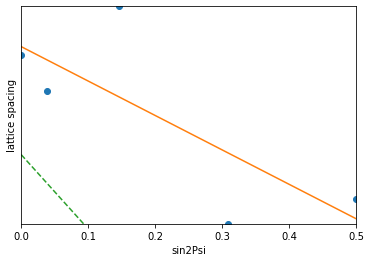

25SC_s1_0042.000.dat
(38.48740589926978, 0.005690330819450385)


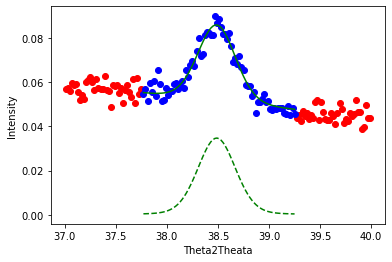

25SC_s1_0042.001.dat
(38.48646990987333, 0.008007338537661566)


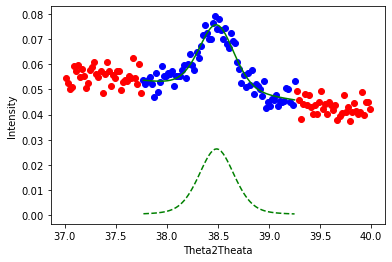

25SC_s1_0042.002.dat
(38.48484227490965, 0.014855016288156418)


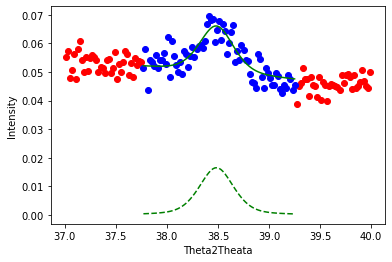

25SC_s1_0042.003.dat
(38.470561452224274, 0.020625032051192805)


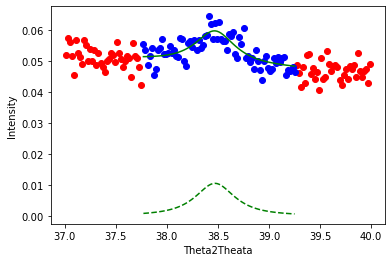

25SC_s1_0042.004.dat
(38.50802179451743, 0.017967372889972594)


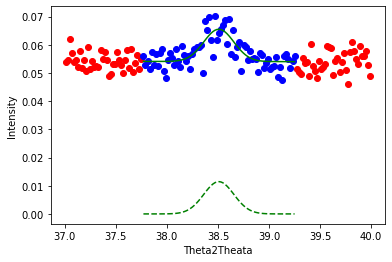

[0.00016969 0.00016488 0.00015643 0.00015992 0.00018667]


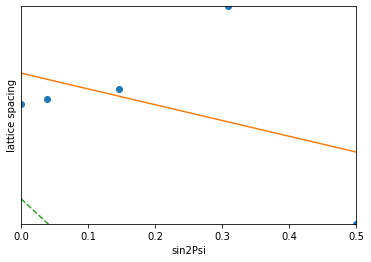

25SC_s1_0043.000.dat
(38.47972368247227, 0.007472738427766571)


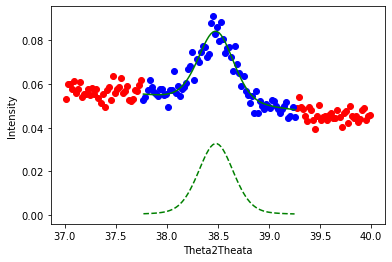

25SC_s1_0043.001.dat
(38.481576018069156, 0.009552648856892023)


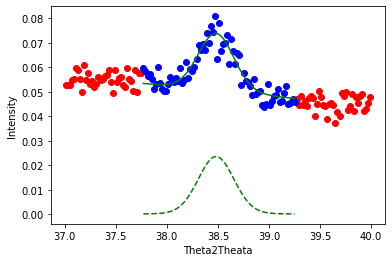

25SC_s1_0043.002.dat
(38.469573447509, 0.012749716121624295)


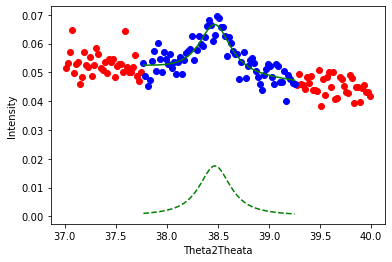

25SC_s1_0043.003.dat
(38.452907411805306, 0.016856345664389486)


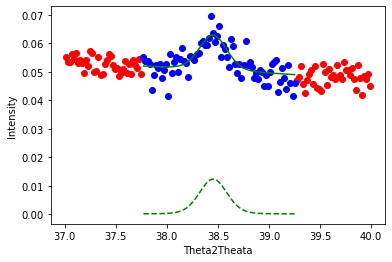

25SC_s1_0043.004.dat
(38.512614315296496, 0.013475757540138937)


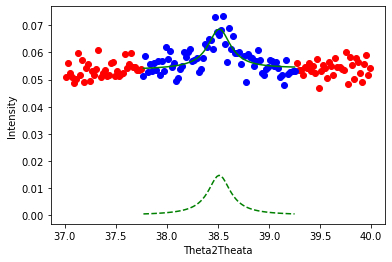

[0.00027987 0.00027193 0.00025799 0.00026375 0.00030786]


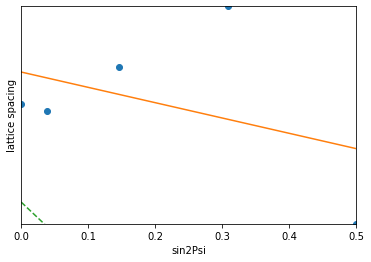

25SC_s1_0044.000.dat
(38.48371342742538, 0.008178256276062374)


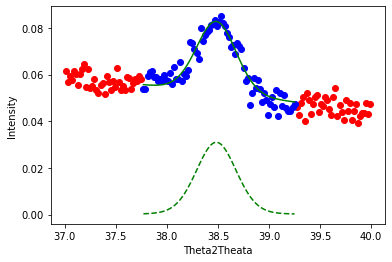

25SC_s1_0044.001.dat
(38.464839540242494, 0.00933698639882862)


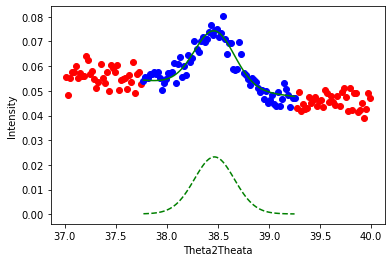

25SC_s1_0044.002.dat
(38.50440854659191, 0.011969745940088424)


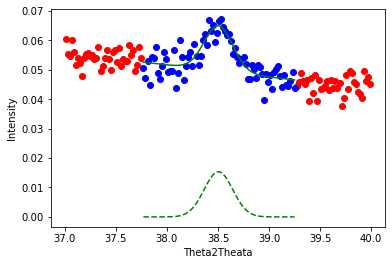

25SC_s1_0044.003.dat
(38.54760068721609, 0.016840011295070834)


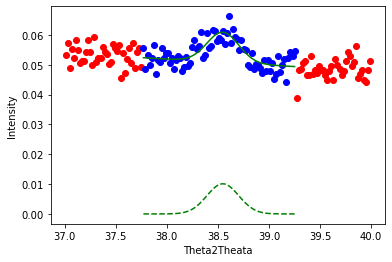

25SC_s1_0044.004.dat
(38.52610334569072, 0.01739363265952643)


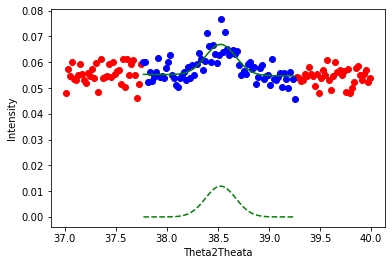

[0.0002753  0.00026749 0.00025378 0.00025945 0.00030284]


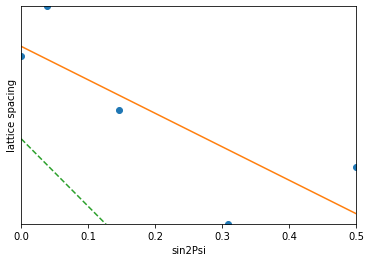

25SC_s1_0045.000.dat
(38.495190396356385, 0.00737590479651969)


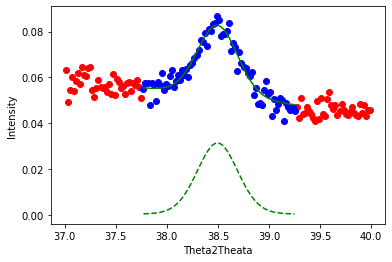

25SC_s1_0045.001.dat
(38.47620302834317, 0.008173194977175566)


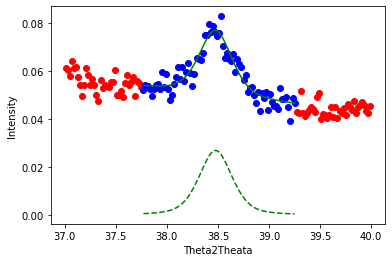

25SC_s1_0045.002.dat
(38.50028114357677, 0.012946744667248277)


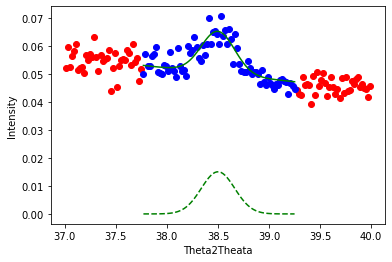

25SC_s1_0045.003.dat
(38.53242068347262, 0.014749472330362058)


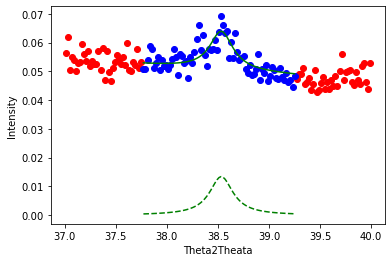

25SC_s1_0045.004.dat
(38.52980833276776, 0.015333594693600553)


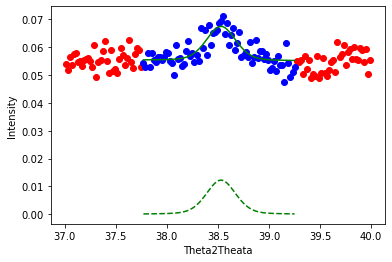

[0.00016304 0.00015842 0.0001503  0.00015365 0.00017935]


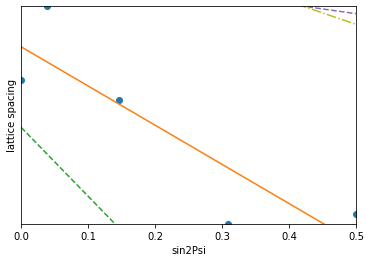

25SC_s1_0046.000.dat
(38.483316116749265, 0.00862040902316167)


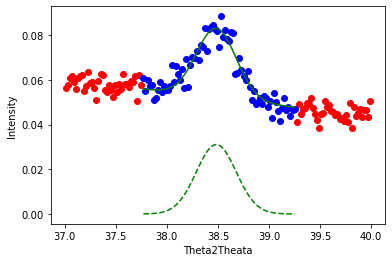

25SC_s1_0046.001.dat
(38.48740551080191, 0.008514563254363845)


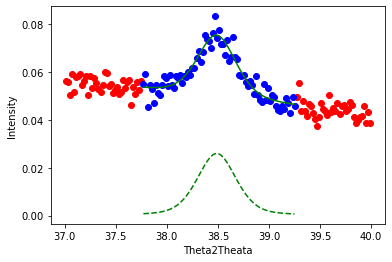

25SC_s1_0046.002.dat
(38.487918271713035, 0.014394943727968578)


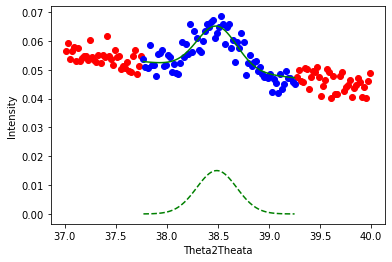

25SC_s1_0046.003.dat
(38.527663229124535, 0.0248967490882309)


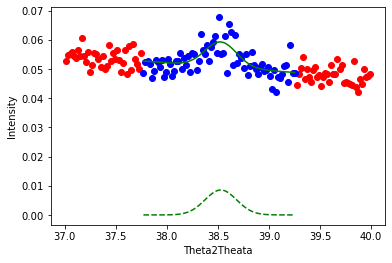

25SC_s1_0046.004.dat
(38.54847641143259, 0.016569527644206047)


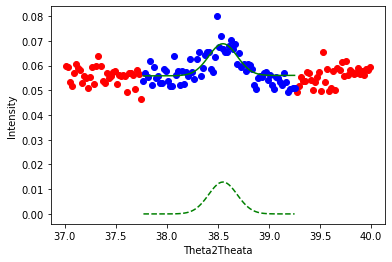

[9.65939797e-05 9.38548197e-05 8.90438417e-05 9.10318919e-05
 1.06256465e-04]


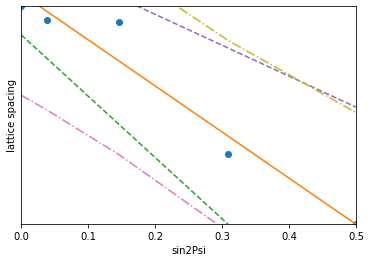

25SC_s1_0047.000.dat
(38.49165114687412, 0.007335865944661679)


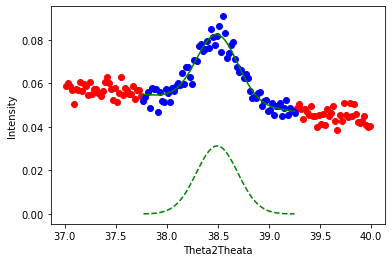

25SC_s1_0047.001.dat
(38.46833444162484, 0.010908541251202473)


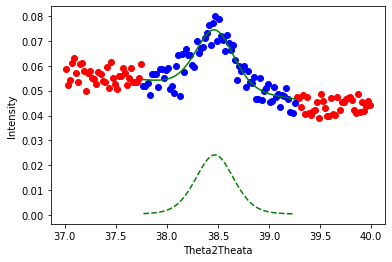

25SC_s1_0047.002.dat
(38.48637265386701, 0.009714130689550947)


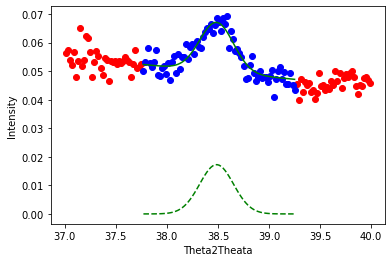

25SC_s1_0047.003.dat
(38.49259324799205, 0.014645258742055927)


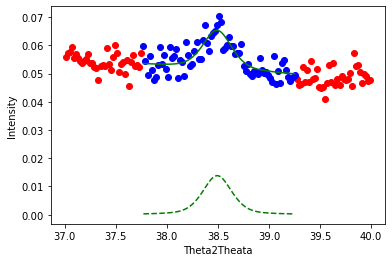

25SC_s1_0047.004.dat
(38.59539980940436, 0.022131736491841743)


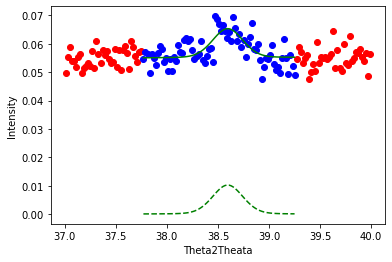

[0.00037186 0.00036131 0.00034279 0.00035045 0.00040906]


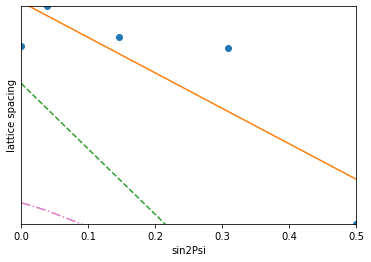

25SC_s1_0048.000.dat
(38.469358517719016, 0.007646947659864148)


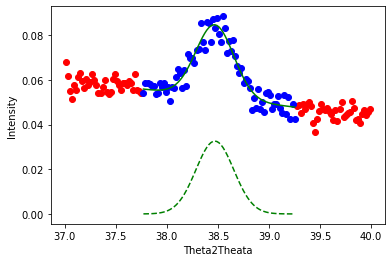

25SC_s1_0048.001.dat
(38.478590771807234, 0.009880585395898069)


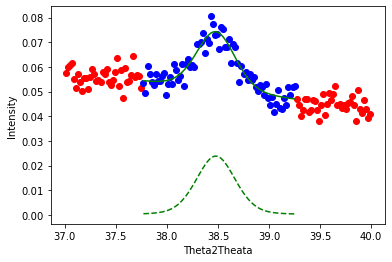

25SC_s1_0048.002.dat
(38.50140915535267, 0.012200453890182851)


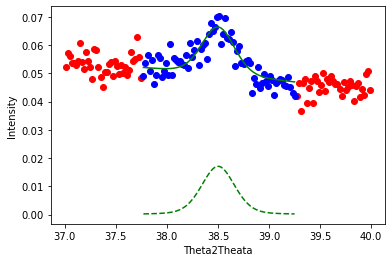

25SC_s1_0048.003.dat
(38.50562397939496, 0.02050382571135506)


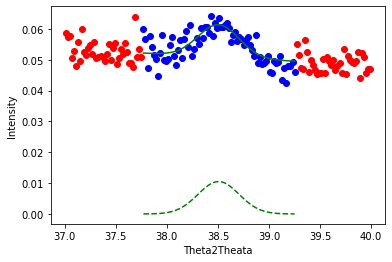

25SC_s1_0048.004.dat
(38.57854393416701, 0.018882125700867988)


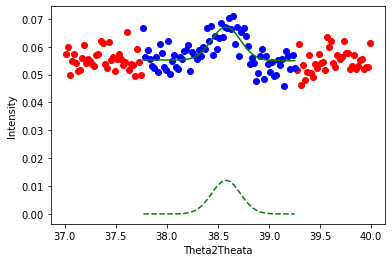

[0.00018596 0.00018069 0.00017143 0.00017526 0.00020457]


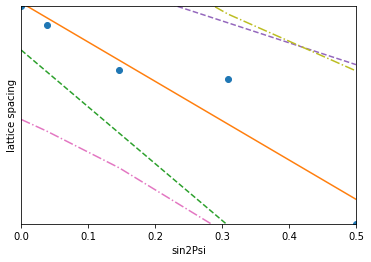

25SC_s1_0049.000.dat
(38.465214831665264, 0.00695020935446303)


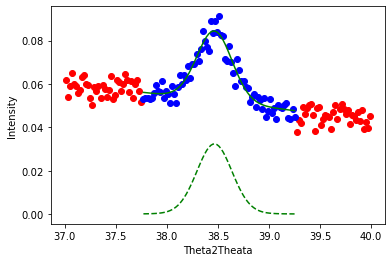

25SC_s1_0049.001.dat
(38.48045749471867, 0.010565589809321117)


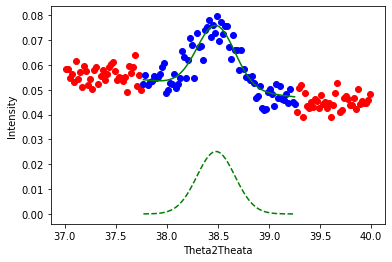

25SC_s1_0049.002.dat
(38.47885345880127, 0.01205610056153787)


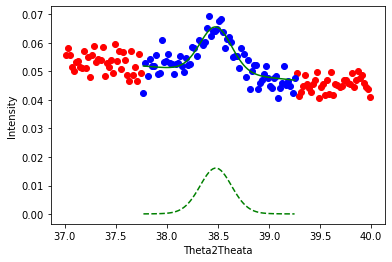

25SC_s1_0049.003.dat
(38.52698698747386, 0.018971766582541103)


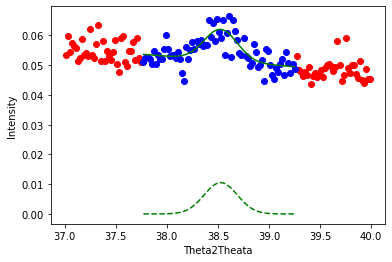

25SC_s1_0049.004.dat
(38.55212923414621, 0.01524964413020838)


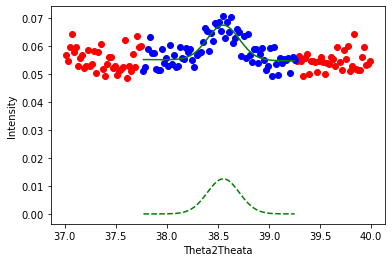

[0.0001158  0.00011252 0.00010675 0.00010914 0.00012739]


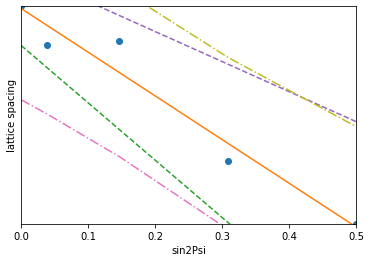

25SC_s1_0050.000.dat
(38.47091218686706, 0.007682975143499465)


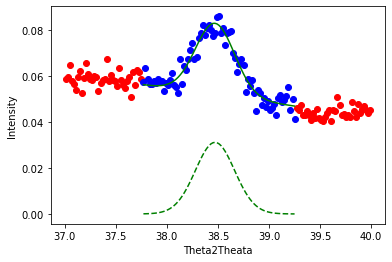

25SC_s1_0050.001.dat
(38.46582045225749, 0.008462438790460318)


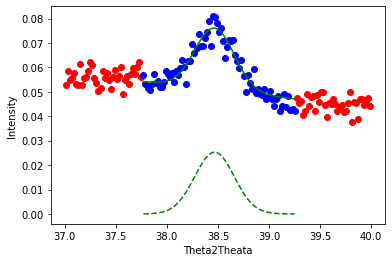

25SC_s1_0050.002.dat
(38.47978539174993, 0.014469820508241945)


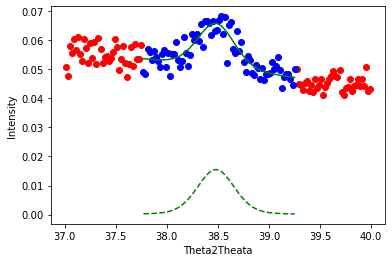

25SC_s1_0050.003.dat
(38.494167758047105, 0.016513621946765113)


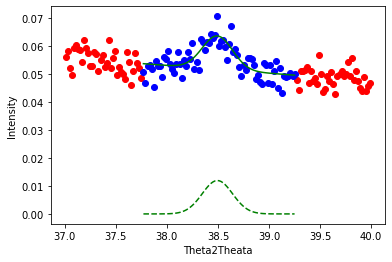

25SC_s1_0050.004.dat
(38.57925210905407, 0.014804362914305468)


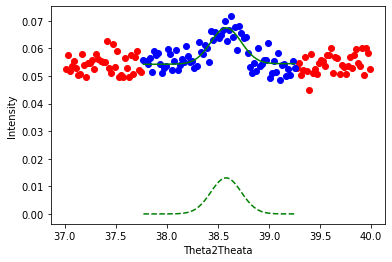

[0.00025268 0.00024552 0.00023293 0.00023813 0.00027796]


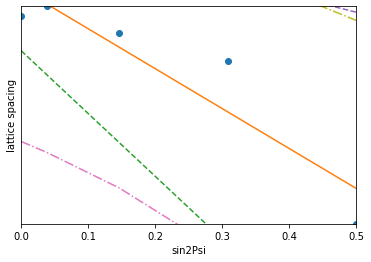

25SC_s1_0051.000.dat
(38.45611508270276, 0.007746548339413202)


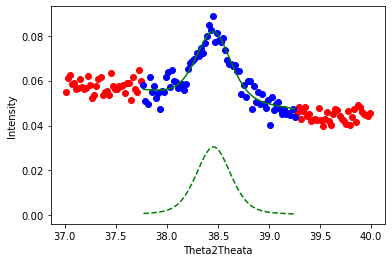

25SC_s1_0051.001.dat
(38.480766106681806, 0.009520416040583035)


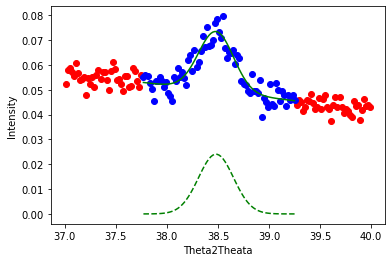

25SC_s1_0051.002.dat
(38.489971956627116, 0.013668064768563281)


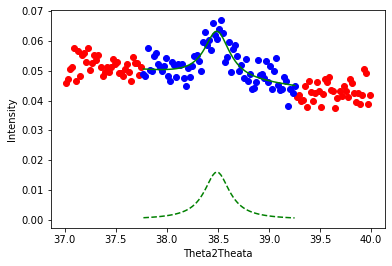

25SC_s1_0051.003.dat
(39.0682896357079, 0.02584022327033251)


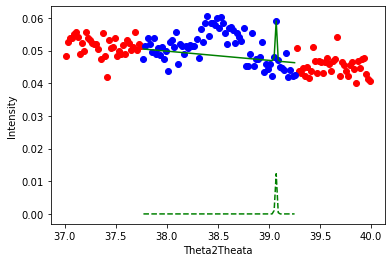

25SC_s1_0051.004.dat
(38.55307383430107, 0.019824682639531643)


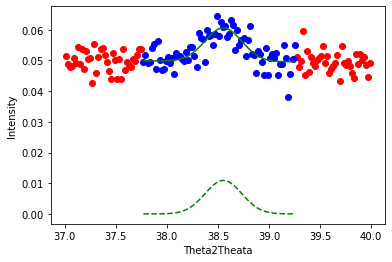

[0.00322276 0.00313137 0.00297086 0.00303719 0.00354514]


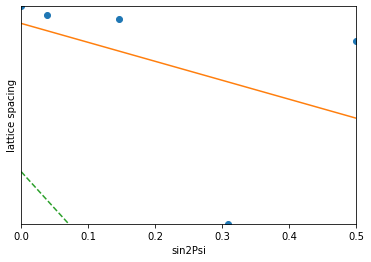

25SC_s1_0052.000.dat
(38.46817848103361, 0.008742906634404036)


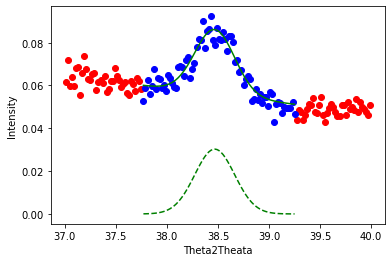

25SC_s1_0052.001.dat
(38.46401625803032, 0.0073663656538703924)


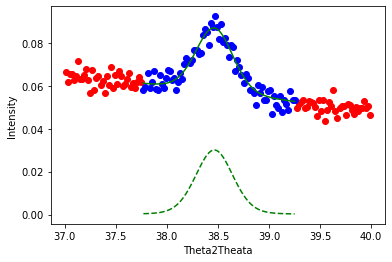

25SC_s1_0052.002.dat
(38.46038205700985, 0.008761223364362334)


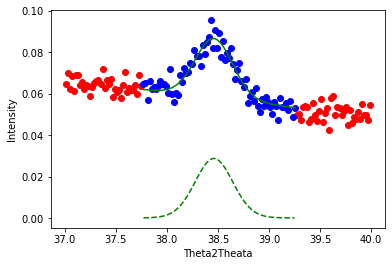

25SC_s1_0052.003.dat
(38.46146405197225, 0.009022432088880008)


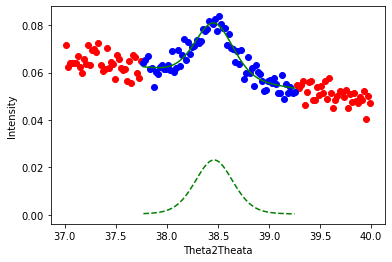

25SC_s1_0052.004.dat
(38.501936873017456, 0.012335677768844283)


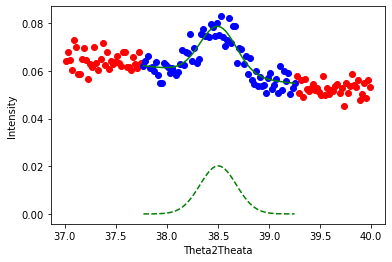

25SC_s1_0052.005.dat
(38.51204665684437, 0.014144074612823824)


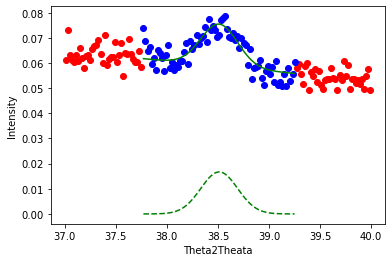

25SC_s1_0052.006.dat
(38.49892123152392, 0.01856712449897434)


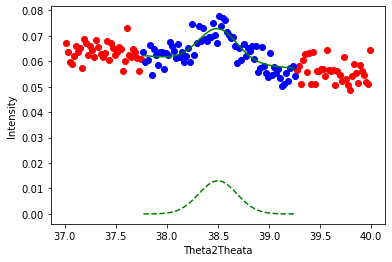

25SC_s1_0052.007.dat
(38.51765146038566, 0.015427888573632788)


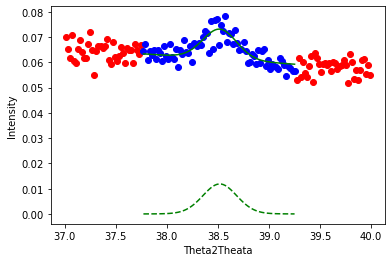

25SC_s1_0052.008.dat
(38.53434932510513, 0.01827978072994235)


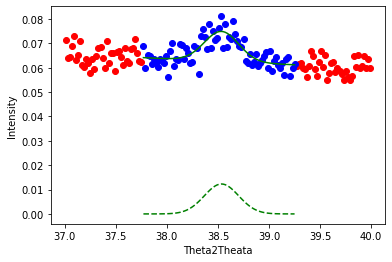

25SC_s1_0052.009.dat
(38.58410793189554, 0.011068246095692428)


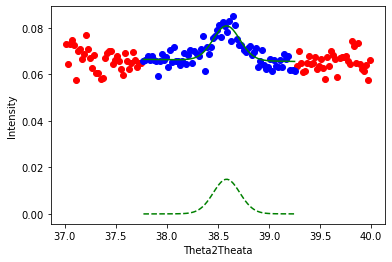

[0.0001586  0.00015796 0.00015619 0.00015378 0.00015148 0.00015026
 0.00015112 0.00015485 0.00016183 0.00017187]


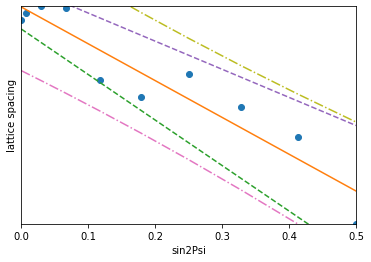

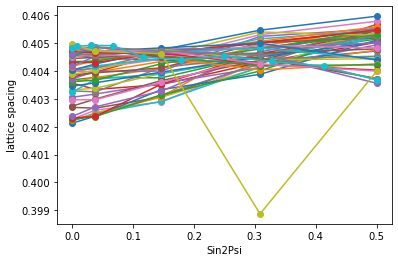

In [15]:
stress_result=run_sample(PATH,SPEC_FILE, SCAN_START, SCAN_END, XRAY_CONSTANT, WEAVELENGTH, PEAK, PEAK_PARAMS)

WARNING *** file size (828495) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


(-1000.0, 1000.0)

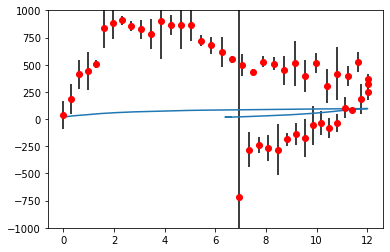

In [16]:
file_anton, stress_result=correlate_anton(stress_result, PATH_ANTON, FILE_ANTON)
plt.ylim(-1000,1000)

In [17]:
stress_result

{3: {'stress': 34.055801136658424,
  'stress_min': -95.03388646417443,
  'stress_max': 163.1454887374913,
  'k': 0.0002540122505191311,
  'd': 0.4044473553083458,
  'lattice_spacing': array([0.40457297, 0.40447899, 0.40438295, 0.40433222, 0.40472192]),
  'psi_values': array([0.        , 0.19634954, 0.39269908, 0.58904862, 0.78539816]),
  'sin2_psi': array([0.        , 0.03806023, 0.14644661, 0.30865828, 0.5       ]),
  'time': <ipynb.fs.full.bessy_kmc_II_master.Time_Object at 0x20569f3af48>,
  'fwhm': [0.37447103622452627,
   0.339456756625937,
   0.4189346345906586,
   0.3468244500024038,
   0.3793982262997728],
  'elongation': 0.0},
 4: {'stress': 182.43595550936286,
  'stress_min': 44.1375205558425,
  'stress_max': 320.7343904628832,
  'k': 0.0013588331638416662,
  'd': 0.40397358122831956,
  'lattice_spacing': array([0.4040071 , 0.4039547 , 0.40434262, 0.40416165, 0.40475138]),
  'psi_values': array([0.        , 0.19634954, 0.39269908, 0.58904862, 0.78539816]),
  'sin2_psi': array(

In [18]:
save_data(PATH, SPEC_FILE, stress_result)

KeyError: 'elongation'